Anggota Kelompok dan NIM

*   Muhammad Hadi Nur Fakhri (202110370311255)
*   Mochammad Azizil Akbar (202110370311284)

Data Mining C



# import library dan data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
df = pd.read_csv('Drinking_water.csv')
print(df)

      Unnamed: 0        ph    Hardness        Solids  Chloramines     Sulfate  \
0              0       NaN  204.890455  20791.318981     7.300212  368.516441   
1              1  3.716080  129.422921  18630.057858     6.635246         NaN   
2              2  8.099124  224.236259  19909.541732     9.275884         NaN   
3              3  8.316766  214.373394  22018.417441     8.059332  356.886136   
4              4  9.092223  181.101509  17978.986339     6.546600  310.135738   
...          ...       ...         ...           ...          ...         ...   
3271        3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272        3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273        3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274        3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275        3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic

In [ ]:
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("Carcinogenics", axis=1)
df = df.drop("medical_waste", axis=1)

# EDA

In [ ]:
# Menampilkan 5 Data Awal dari Dataset
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
# Menampilkan 10 Sampel Data dari Dataset
df.sample(10)

ph    Hardness        Solids  Chloramines     Sulfate  \
2923   6.532097  163.396241   8240.812709     6.641543  402.836817   
3148   8.076126  132.670305  10816.273367     9.513269  314.970495   
3133   4.337119  207.361907  34355.618427     6.809153  374.072772   
2866   4.077920  185.852326   9975.601334    10.758464         NaN   
805   10.905076  207.004837  16099.151896     8.186479  369.683867   
1477   5.198068  200.464445  37200.242065     7.401099  311.794887   
1230   7.943882  211.816551  32071.179369     7.769215  290.337398   
2943  10.893485  177.734357  25702.518673     7.659830  312.399335   
15     6.347272  186.732881  41065.234765     9.629596  364.487687   
722    8.860451  193.743105  24085.112140     6.183110         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2923    601.032982       17.896128        55.022407   4.599324           0  
3148    479.758924       14.685851        72.638303   4.291355           1  
3133    530.069602       12.622032        44.750359   4.401635           1  
2866    307.877571        9.702581        64.361116   4.789052           1  
805     575.309037       17.556880        80.749849   3.720264           1  
1477    573.135532       17.238656        74.948217   3.295034           0  
1230    353.336484       17.871950        78.492783   4.111691           0  
2943    383.199585       17.472109        42.814570   3.634970           0  
15      516.743282       11.539781        75.071617   4.376348           0  
722     526.704924        9.901328        81.339340   4.677713           1

In [ ]:
# Menampilkan Informasi seperti jumlah data dan tipe data dari Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [ ]:
# Menampilkan Jumlah dari Setiap Kelas dari Dataset
class_counts = df['Potability'].value_counts()
jumlah_kelas_0 = class_counts[0]
jumlah_kelas_1 = class_counts[1]

print("\nJumlah data berkelas 0:", jumlah_kelas_0)
print("Jumlah data berkelas 1:", jumlah_kelas_1)


Jumlah data berkelas 0: 1998
Jumlah data berkelas 1: 1278


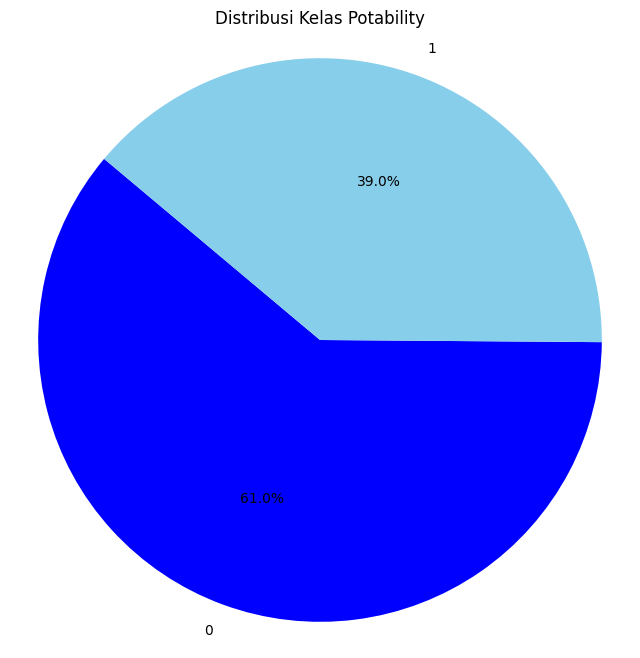

In [ ]:
# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['blue', 'skyblue'], startangle=140)
plt.title('Distribusi Kelas Potability')
plt.axis('equal')
plt.show()

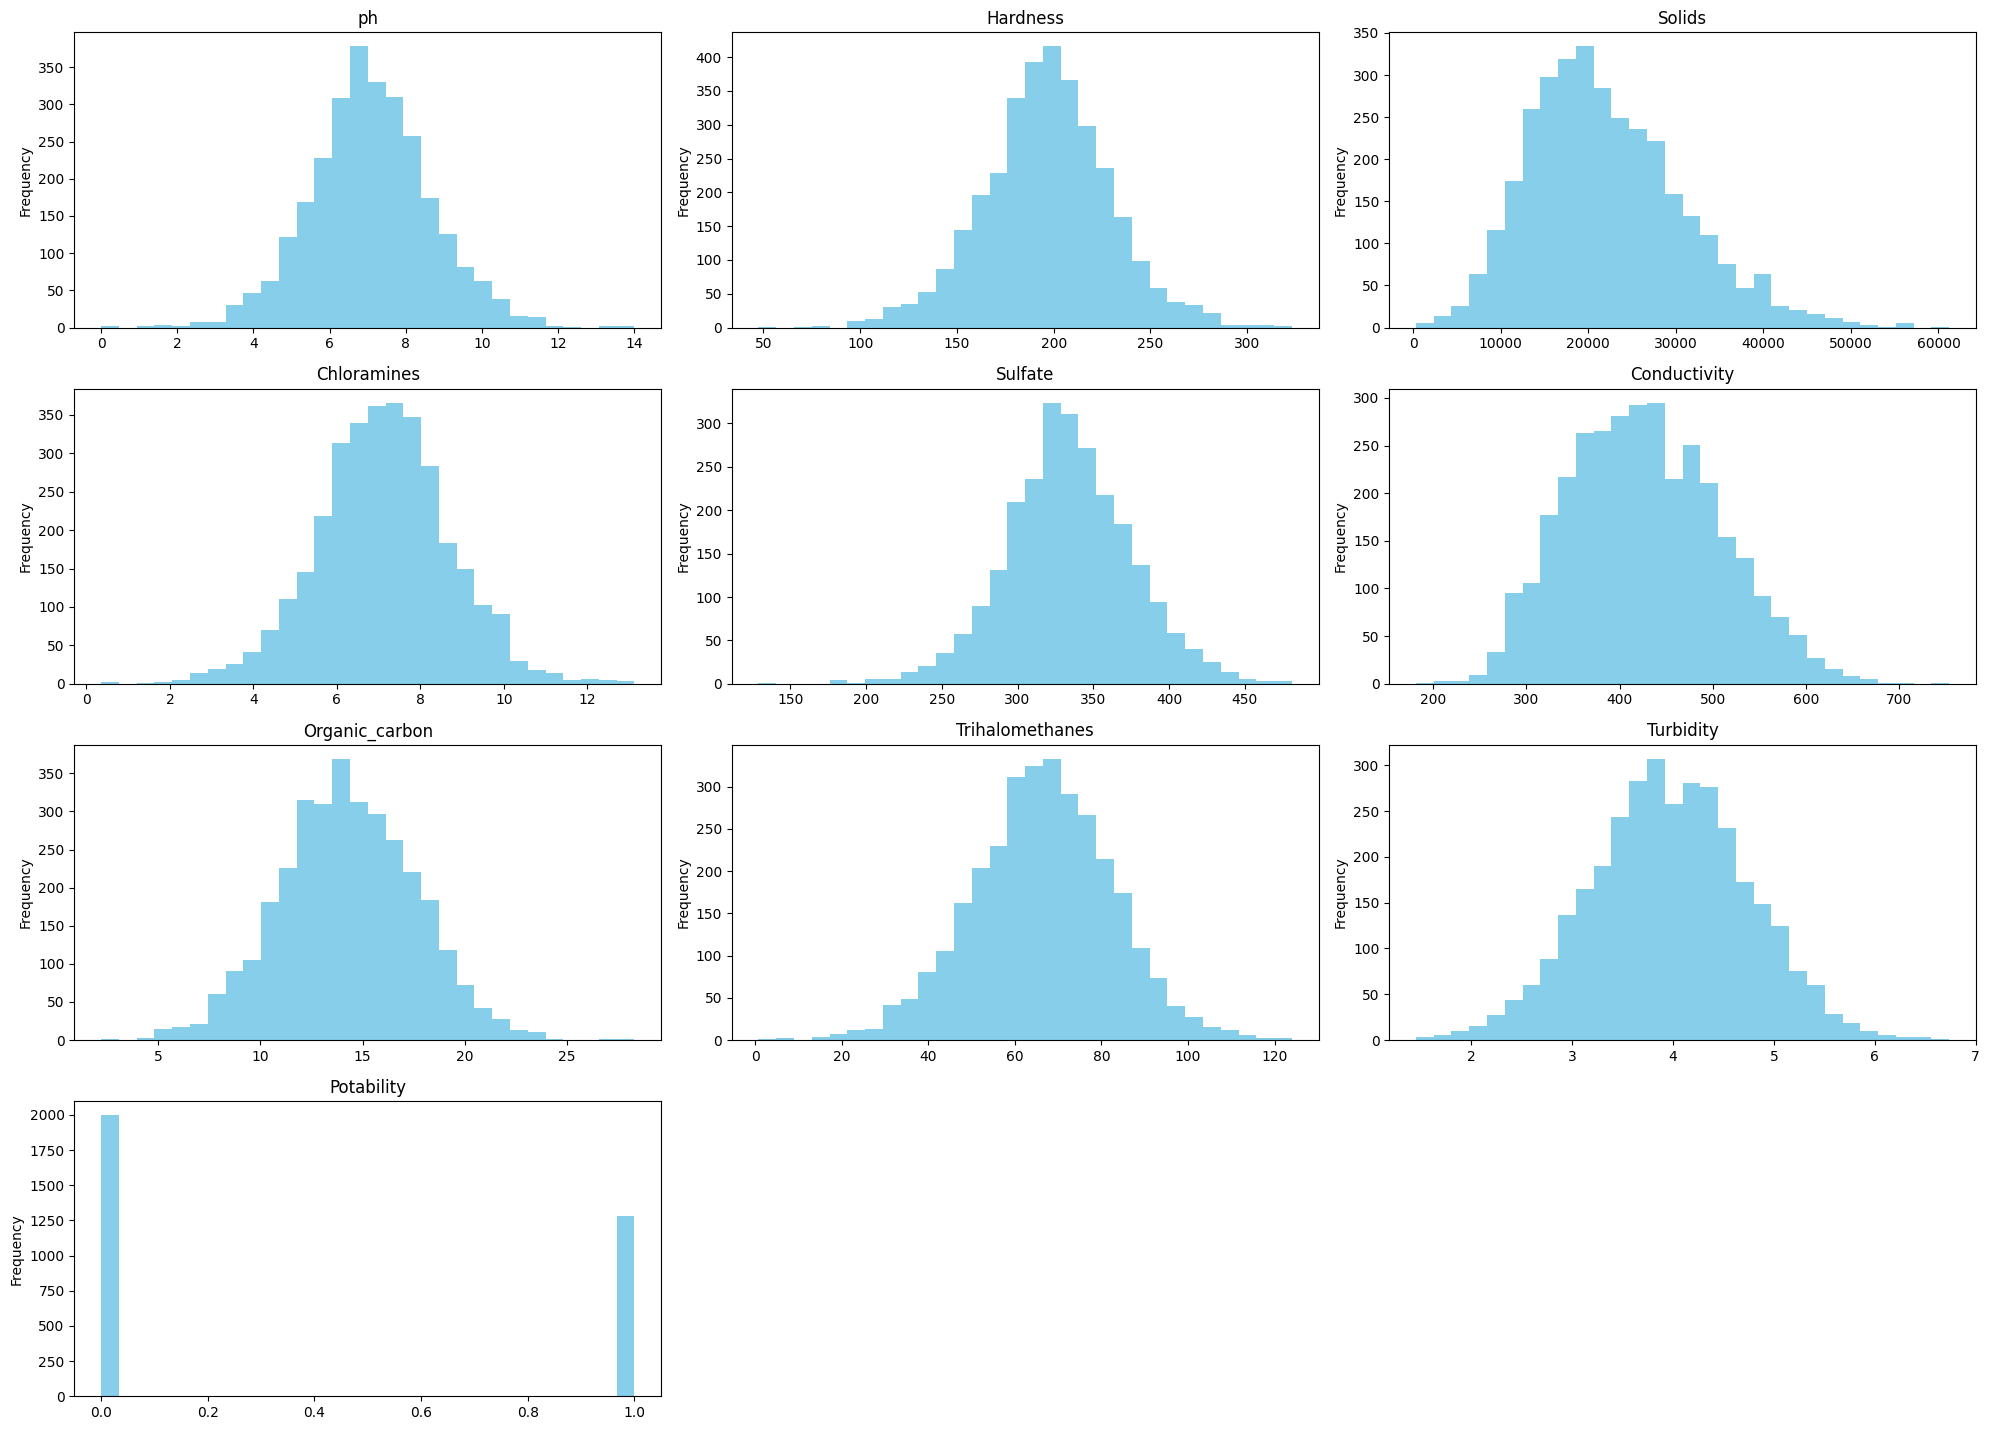

In [ ]:
# Membuat histogram untuk setiap kolom dalam dataset
fig, axes = plt.subplots(nrows=(len(df.columns) // 3 + 1), ncols=3, figsize=(20, 15))

# Flatten axes array untuk iterasi yang lebih mudah
axes = axes.flatten()

# Menghasilkan histogram untuk setiap kolom
for i, ax in enumerate(axes):
    if i < len(df.columns):
        df.iloc[:, i].plot.hist(ax=ax, bins=30, color='skyblue')
        ax.set_title(df.columns[i])
    else:
        fig.delaxes(ax)

# Menambahkan judul utama untuk seluruh gambar
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

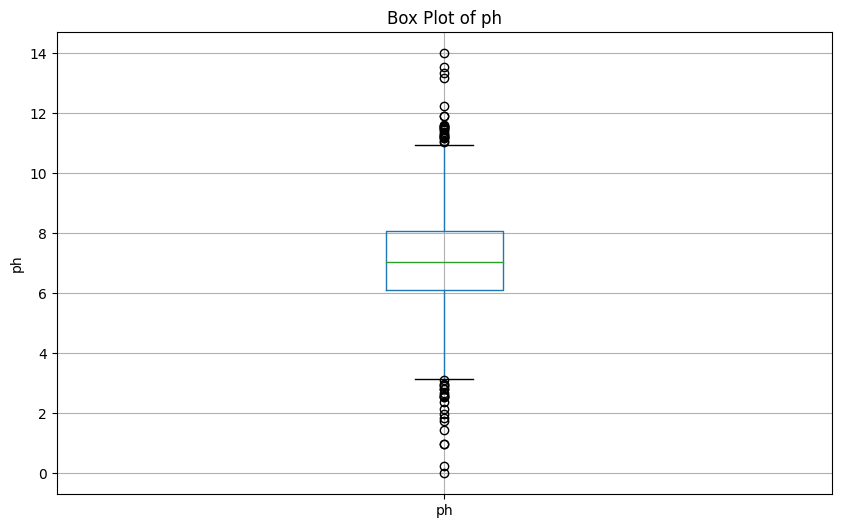

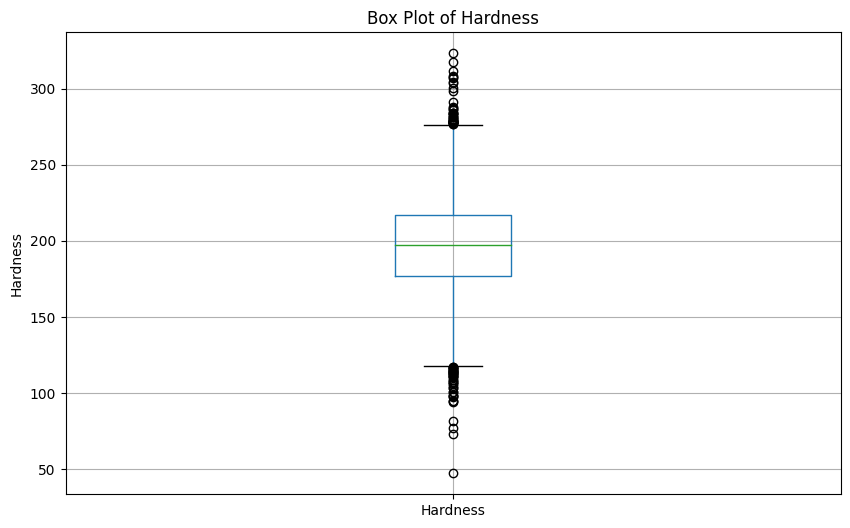

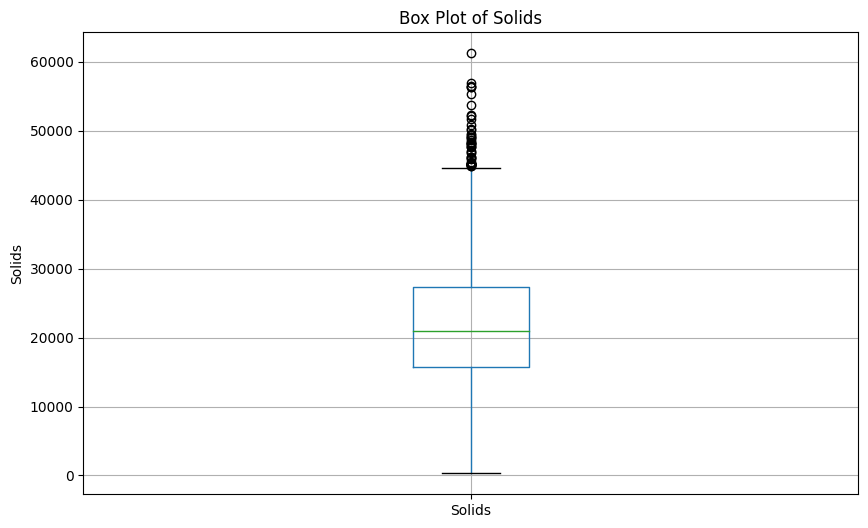

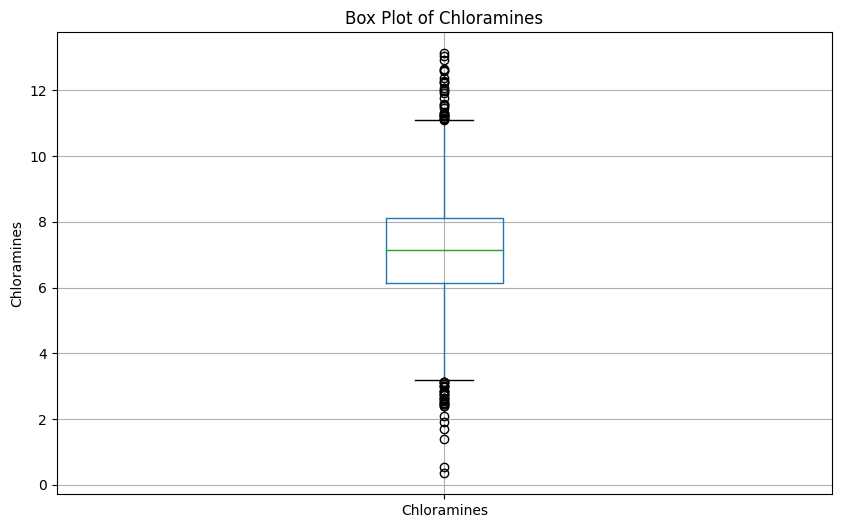

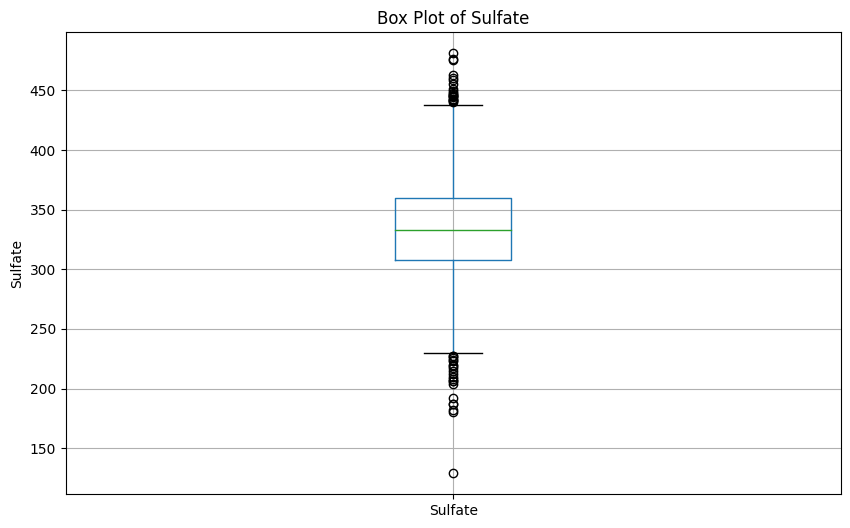

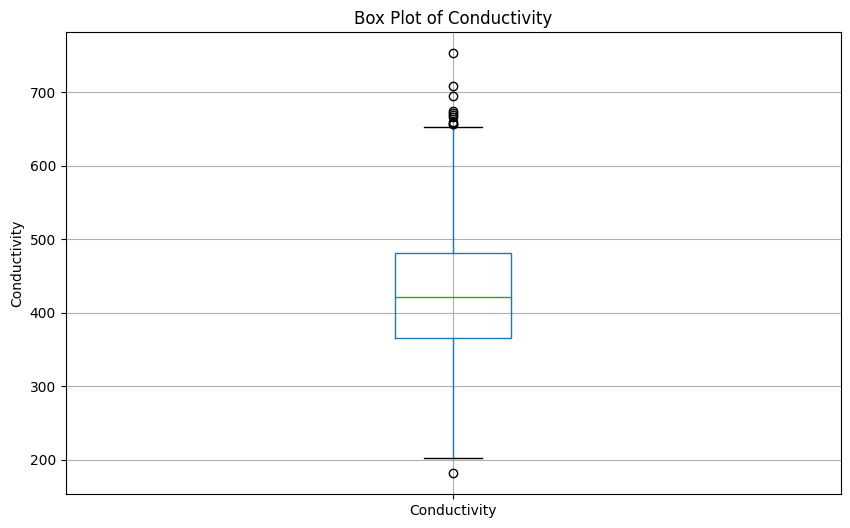

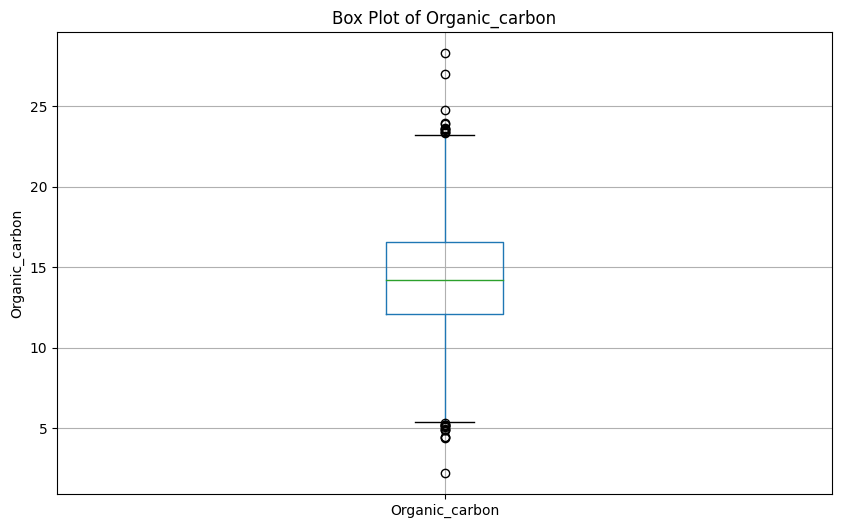

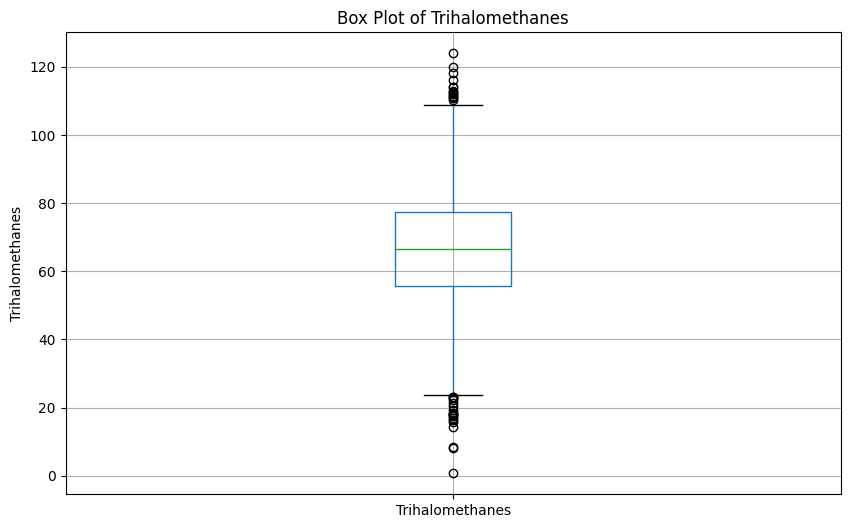

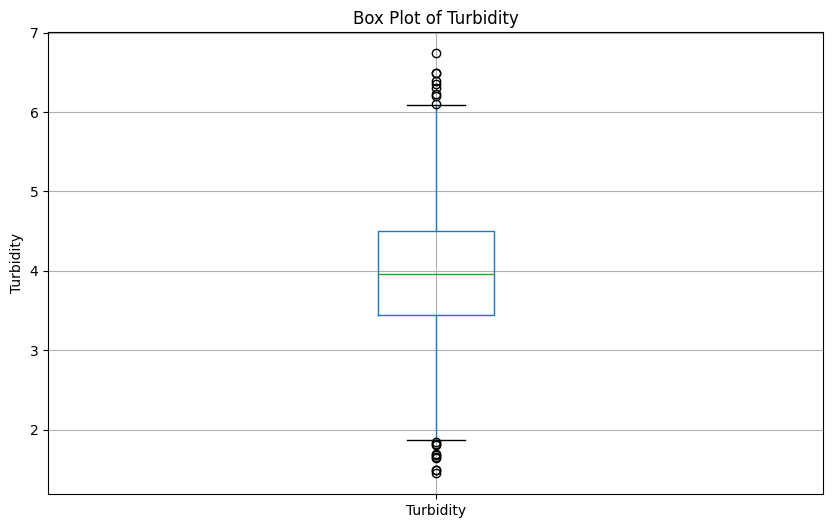

In [ ]:
# Menampilkan box plot untuk menunjukan adanya outlier dalam dataset di setiap fitur
for column in df.columns:
    if column != 'Potability':
        plt.figure(figsize=(10, 6))
        df.boxplot(column=column)
        plt.title(f'Box Plot of {column}')
        plt.ylabel(column)
        plt.show()

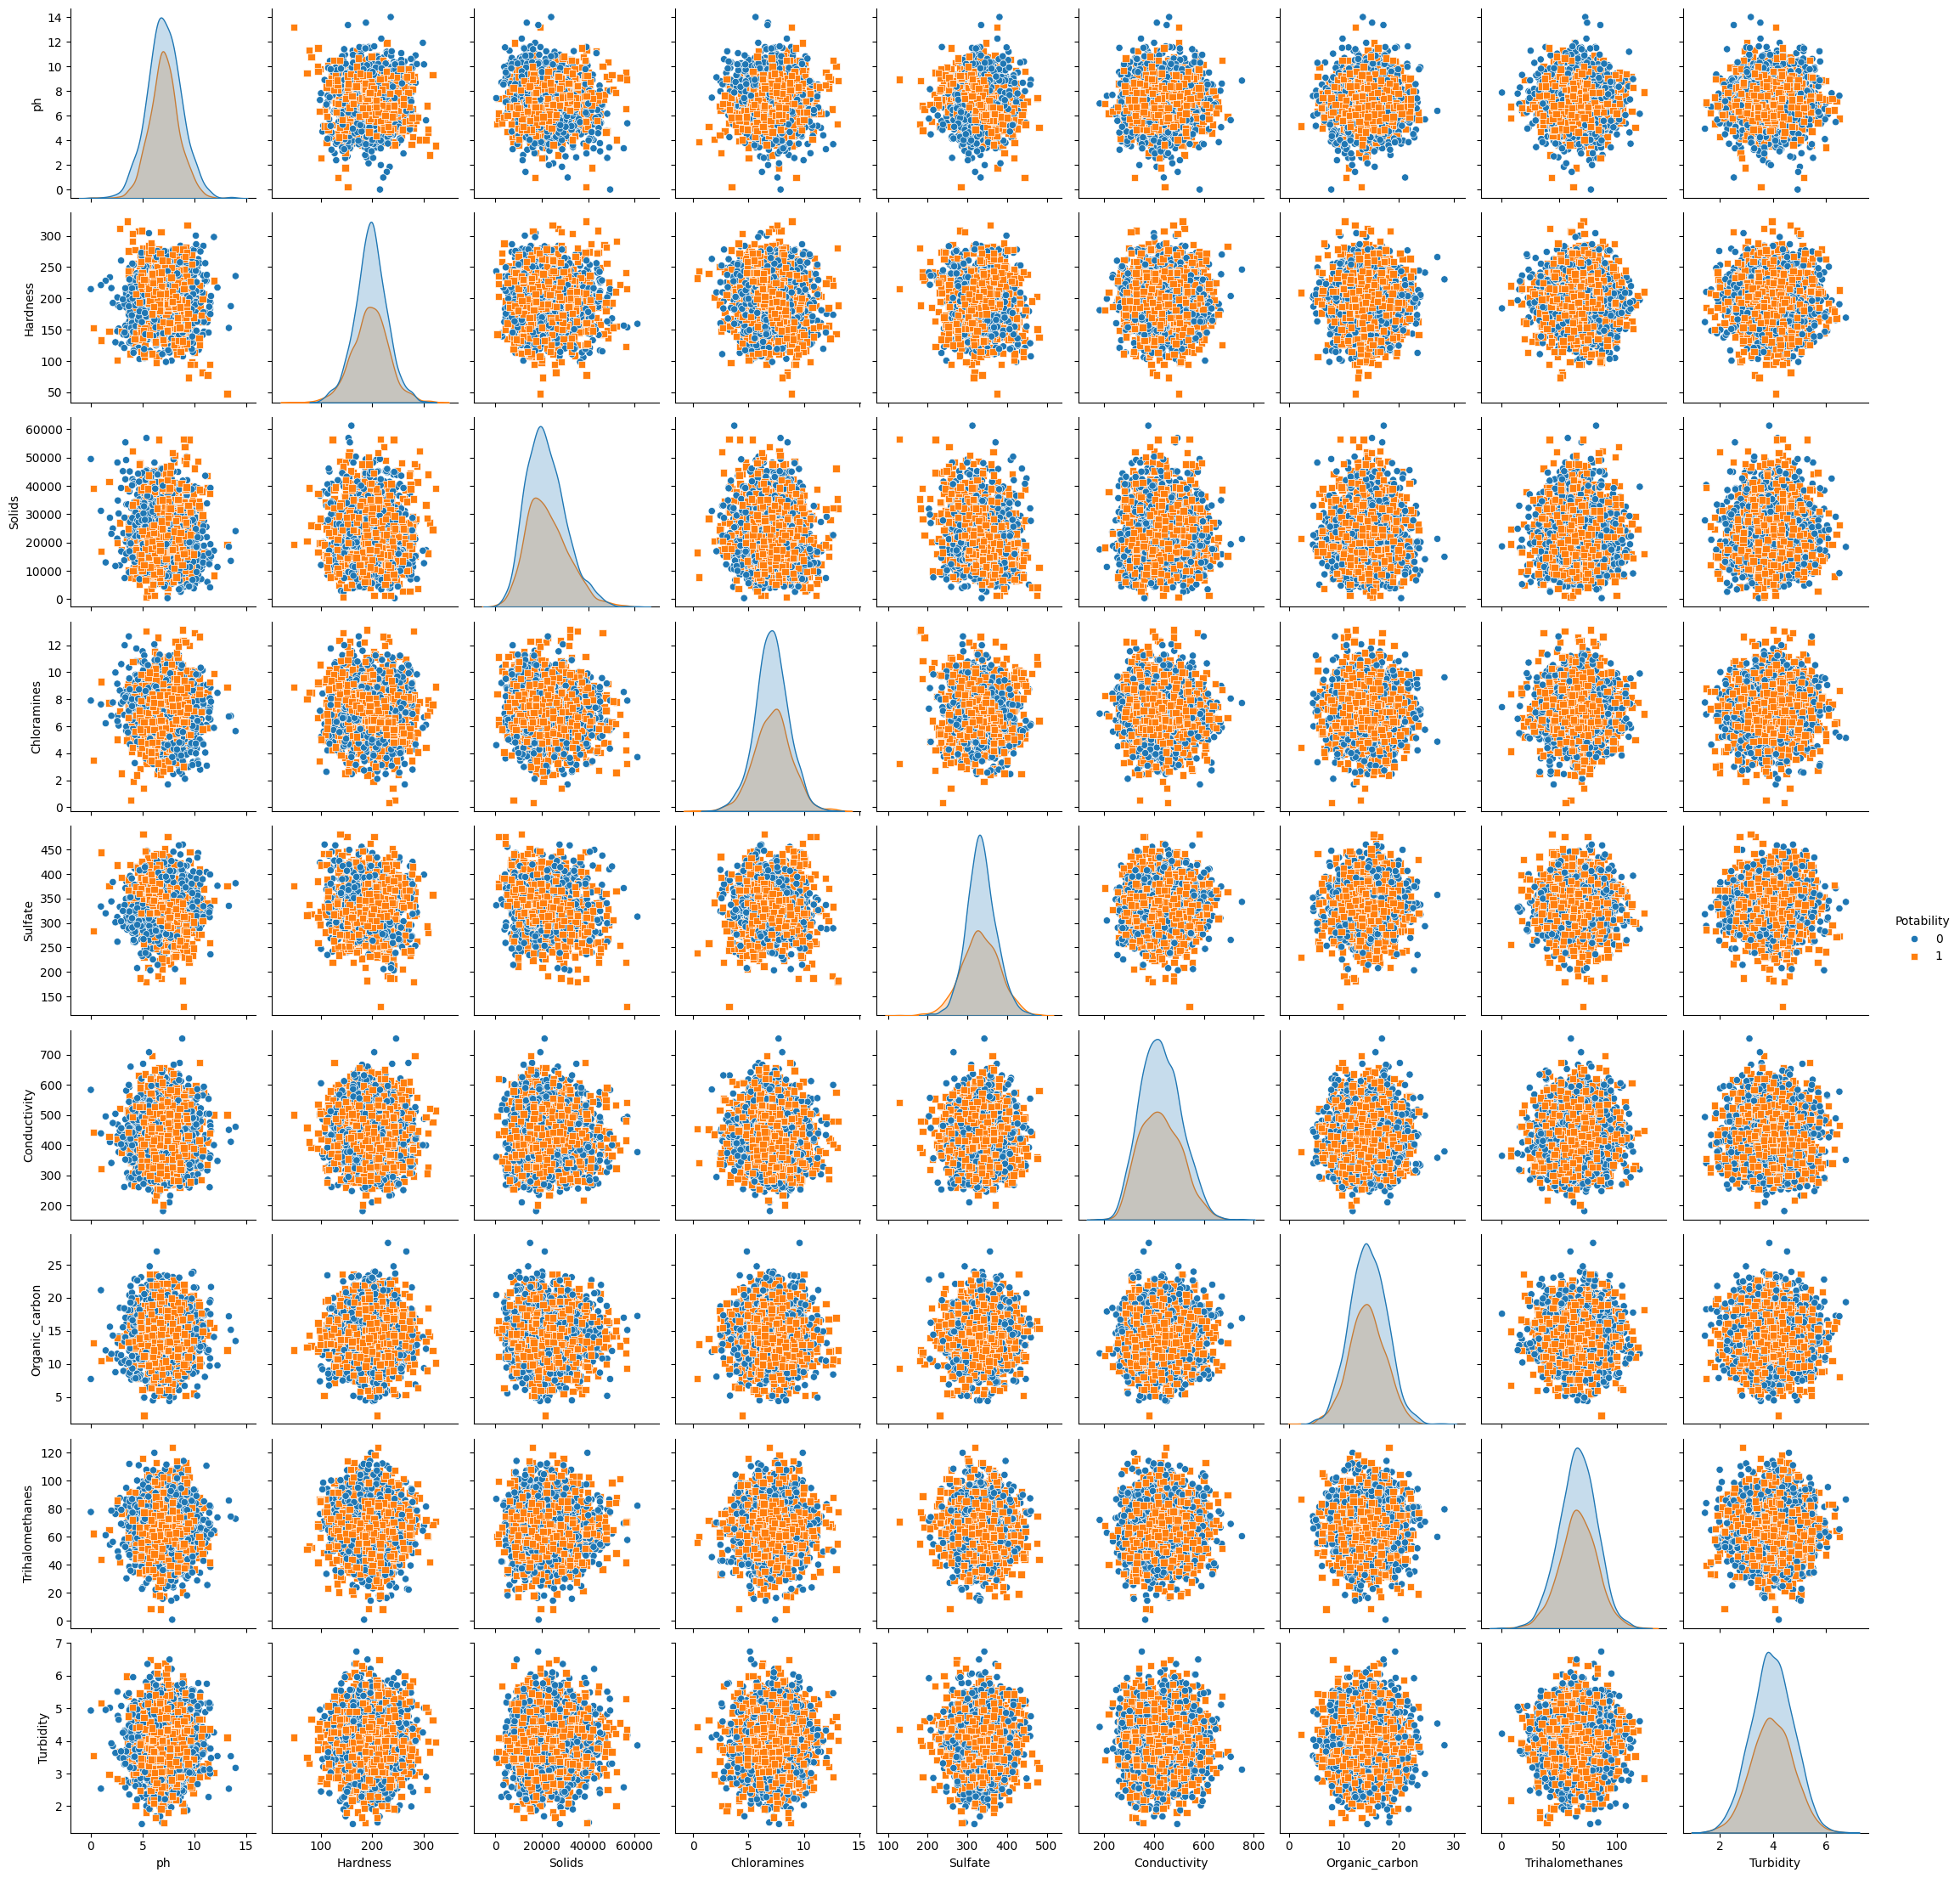

In [ ]:
# Menunjukan hubungan antara fitur dalam dataset
sns.pairplot(df, hue='Potability', markers=["o", "s"])
plt.show()

In [ ]:
print("Nilai Kosong Setiap Kolom")
df.isnull().sum()

Nilai Kosong Setiap Kolom


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
duplicates = df.duplicated(keep=False).sum()
print(f"Jumlah data yang duplikat: {duplicates}")

Jumlah data yang duplikat: 0


# preprocessing dan transformasi

### data cleaning

In [ ]:
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

In [ ]:
print("Nilai Kosong Setiap Kolom")
df.isnull().sum()

Nilai Kosong Setiap Kolom


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### data transformasi

In [ ]:
def remove_outliers_iqr(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        if column != "Potability":
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
            df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Memanggil fungsi untuk mengatasi outliers
df = remove_outliers_iqr(df)

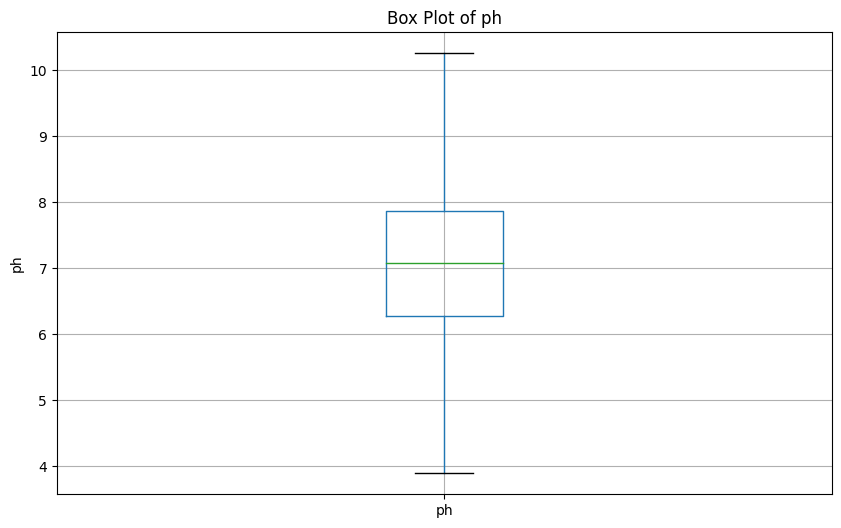

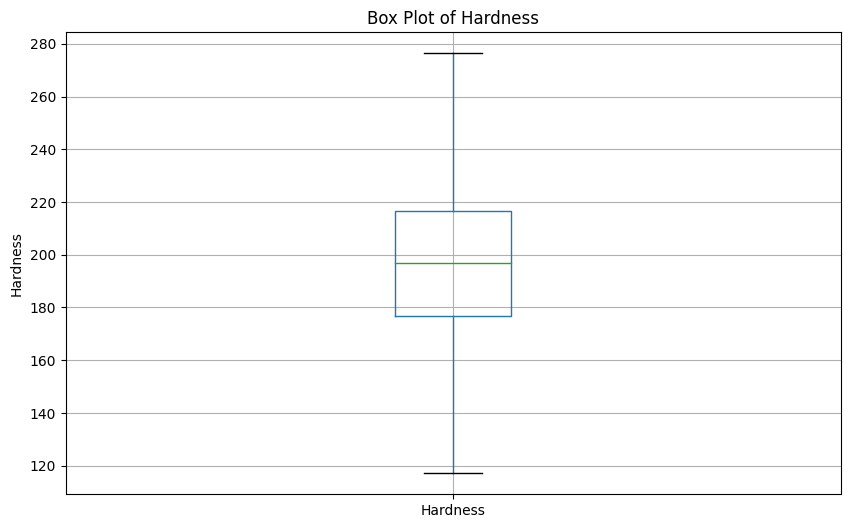

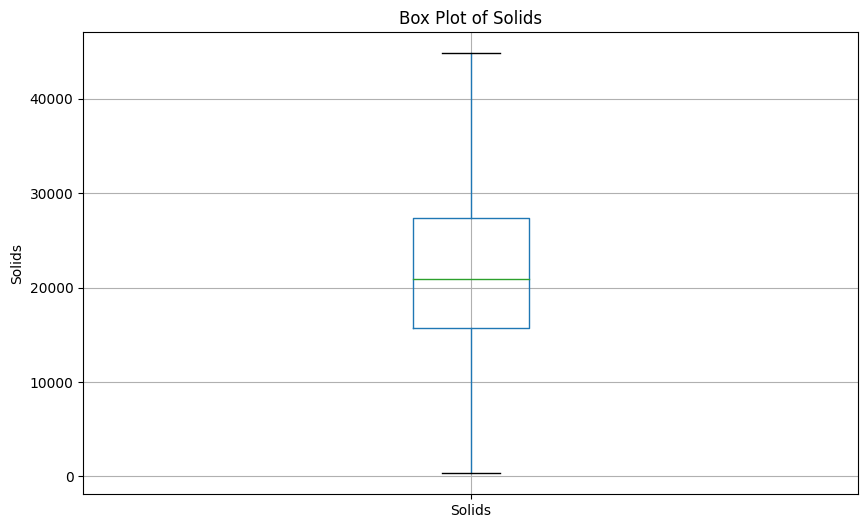

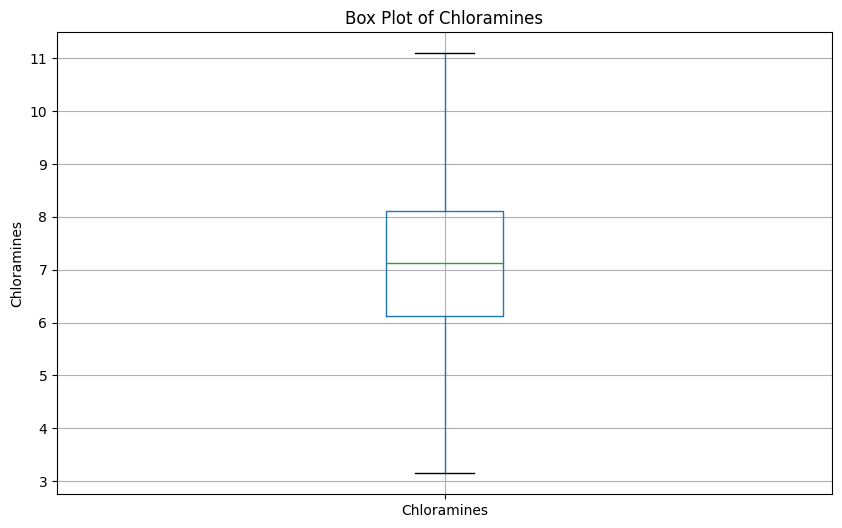

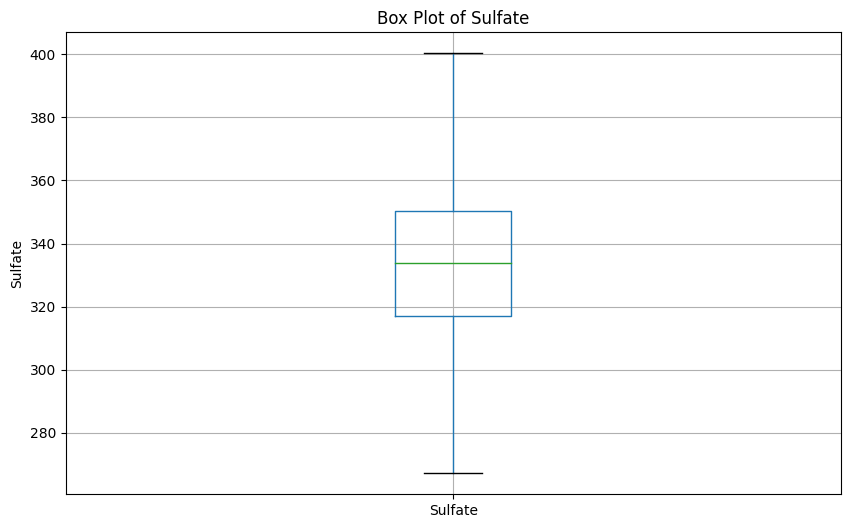

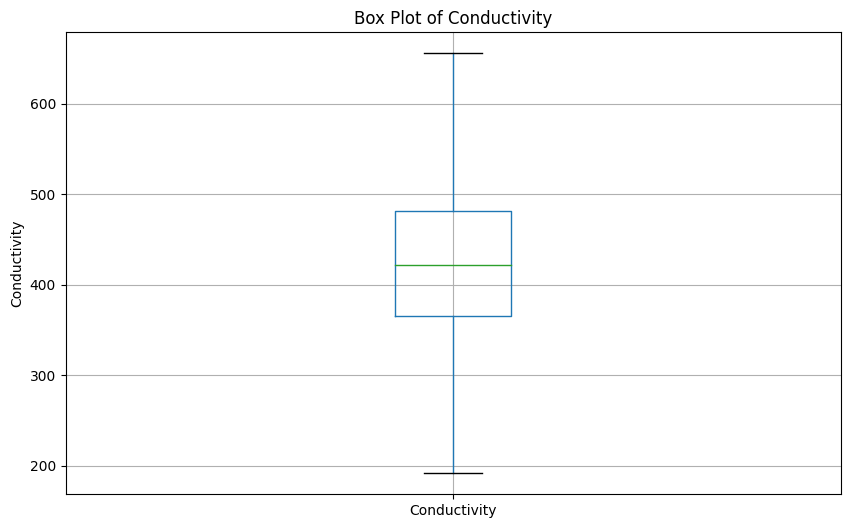

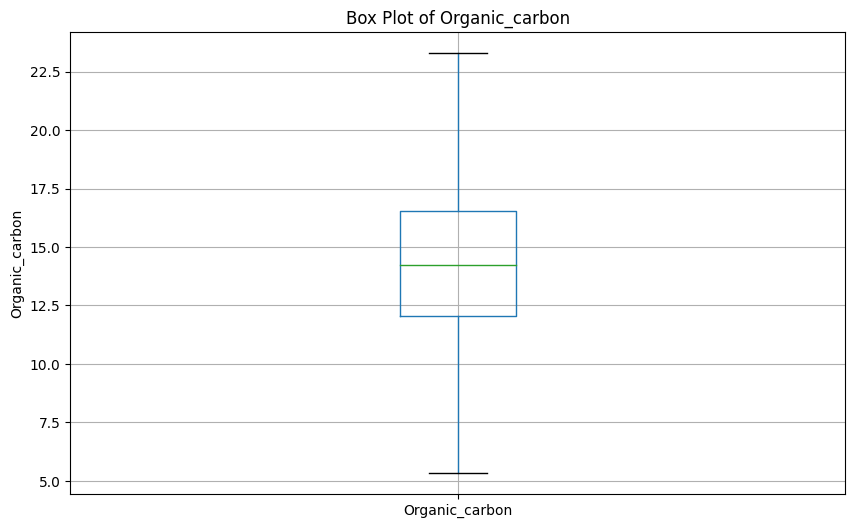

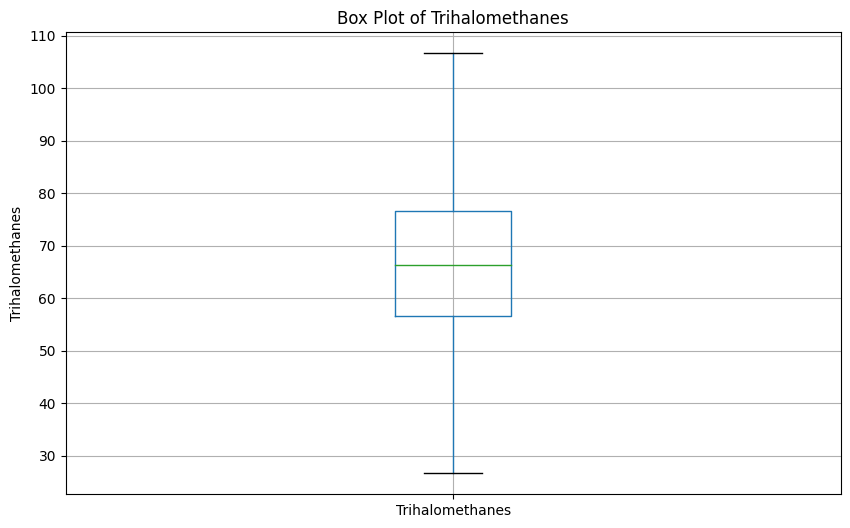

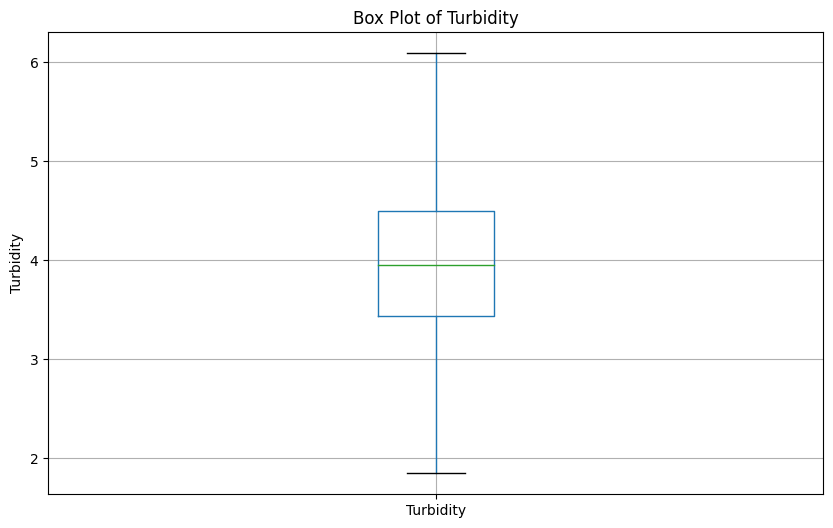

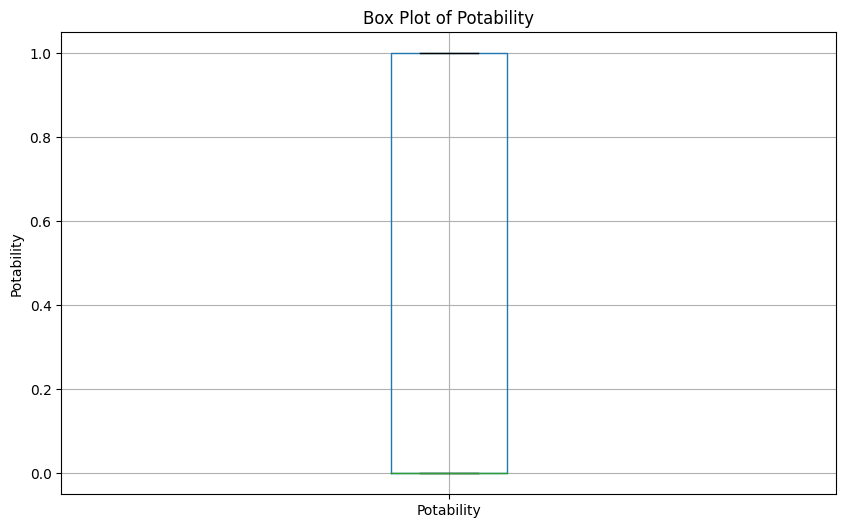

In [ ]:
for column in df.columns:
        plt.figure(figsize=(10, 6))
        df.boxplot(column=column)
        plt.title(f'Box Plot of {column}')
        plt.ylabel(column)
        plt.show()

### Data Normalization

In [ ]:
print("sebelum normalisasi")
df

sebelum normalisasi


ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.889107  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  44831.869873     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [ ]:
X = df.drop(columns=["Potability"])
y = df["Potability"]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan Min-Max Scaling pada atribut lainnya
X_scaled = scaler.fit_transform(X)

# Membuat DataFrame dari hasil scaling
df = pd.DataFrame(X_scaled, columns=X.columns)

# Menggabungkan kembali kolom target
df["Potability"] = y.values

# Verifikasi hasil
print(df.head())

df.to_csv("data_preprocessed.csv", index = False)

         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.501089  0.551055  0.459896     0.522523  0.761153      0.802748   
1  0.000000  0.077214  0.411340     0.438878  0.500267      0.864305   
2  0.660964  0.672523  0.440085     0.771040  0.500267      0.488891   
3  0.695134  0.610596  0.487464     0.618012  0.673815      0.369684   
4  0.816879  0.401691  0.396713     0.427728  0.322742      0.445388   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.281162         0.753932   0.262665           0  
1        0.548326         0.371022   0.625079           0  
2        0.642308         0.497040   0.284538           0  
3        0.729571         0.920658   0.655278           0  
4        0.346753         0.067171   0.524764           0  


In [ ]:
print("setelah normalisasi")
df

setelah normalisasi


ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0     0.501089  0.551055  0.459896     0.522523  0.761153      0.802748   
1     0.000000  0.077214  0.411340     0.438878  0.500267      0.864305   
2     0.660964  0.672523  0.440085     0.771040  0.500267      0.488891   
3     0.695134  0.610596  0.487464     0.618012  0.673815      0.369684   
4     0.816879  0.401691  0.396713     0.427728  0.322742      0.445388   
...        ...       ...       ...          ...       ...           ...   
3271  0.122301  0.480679  1.000000     0.505721  0.696812      0.721141   
3272  0.615393  0.479872  0.382128     0.618267  0.500267      0.432547   
3273  0.868262  0.368169  0.737676     0.528816  0.500267      0.517839   
3274  0.194309  0.712502  0.262024     0.397131  0.500267      0.455022   
3275  0.625726  0.489598  0.383799     0.548825  0.500267      0.292553   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0           0.281162         0.753932   0.262665           0  
1           0.548326         0.371022   0.625079           0  
2           0.642308         0.497040   0.284538           0  
3           0.729571         0.920658   0.655278           0  
4           0.346753         0.067171   0.524764           0  
...              ...              ...        ...         ...  
3271        0.476774         0.500382   0.609797           1  
3272        0.811202         0.496743   0.223797           1  
3273        0.317856         0.539816   0.341803           1  
3274        0.325084         0.635260   0.674108           1  
3275        0.601775         0.650374   0.108511           1  

[3276 rows x 10 columns]

### feature selection

In [ ]:
df = pd.read_csv("data_preprocessed.csv")

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=['Potability'])
y = df['Potability']

#### chi2

In [ ]:
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)

# 5. Pilih fitur yang memiliki nilai Chi-square tertinggi sebagai fitur yang paling relevan.
chi2_scores = chi2_selector.scores_
selected_features = X.columns[chi2_scores.argsort()[::-1]]  # Mengurutkan fitur berdasarkan nilai Chi-square tertinggi.

# Tampilkan hasil seleksi fitur.
print("Fitur yang paling relevan dengan target 'Potability':")
print(selected_features)

Fitur yang paling relevan dengan target 'Potability':
Index(['Solids', 'Organic_carbon', 'Chloramines', 'Sulfate', 'Hardness',
       'Conductivity', 'Trihalomethanes', 'ph', 'Turbidity'],
      dtype='object')


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#### SFS Random Forest

In [ ]:
model = RandomForestClassifier()

In [ ]:
# SFS Forward
sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
# SFS Backward
sfs = SFS(model,
          k_features='best',
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['Turbidity', 'Solids', 'Trihalomethanes', 'Organic_carbon', 'Hardness', 'Conductivity', 'Chloramines', 'ph', 'Sulfate']


#### SFS Naive Bayes

In [ ]:
model = GaussianNB()

In [ ]:
# SFS Forward
sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
# SFS Backward
sfs = SFS(model,
          k_features='best',
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['Sulfate', 'Organic_carbon', 'ph', 'Turbidity', 'Solids', 'Trihalomethanes', 'Conductivity', 'Chloramines', 'Hardness']


#### SFS Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# SFS Forward
sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
# SFS Backward
sfs = SFS(model,
          k_features='best',
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['Hardness', 'Conductivity', 'Sulfate', 'Turbidity', 'Trihalomethanes', 'Organic_carbon', 'Chloramines', 'Solids', 'ph']


#### SFS Decision Tree

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
# SFS Forward
sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
# SFS Backward
sfs = SFS(model,
          k_features='best',
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['Conductivity', 'Organic_carbon', 'Turbidity', 'Trihalomethanes', 'Hardness', 'ph', 'Solids', 'Sulfate', 'Chloramines']


#### SFS XGboost

In [ ]:
model = XGBClassifier()

In [ ]:
# SFS Forward
sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
# SFS Backward
sfs = SFS(model,
          k_features='best',
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['Solids', 'Organic_carbon', 'Conductivity', 'Chloramines', 'Turbidity', 'Trihalomethanes', 'Hardness', 'Sulfate', 'ph']


#### RFE ( Recursive Feature Elimination )

In [ ]:
# RFE dengan RandomForest
model = RandomForestClassifier()

# Menggunakan RFE untuk seleksi fitur
selector = RFE(model, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

# Menampilkan fitur dari yang paling berpengaruh sampai yang tidak berpengaruh
ranked_features = [x for _,x in sorted(zip(selector.ranking_, X.columns))]
print(ranked_features)

['Chloramines', 'Hardness', 'Solids', 'ph', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Turbidity', 'Trihalomethanes']


In [ ]:
class GaussianNBWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.nb = GaussianNB()
        self.coef_ = None

    def fit(self, X, y):
        self.nb.fit(X, y)
        self.coef_ = self.nb.class_prior_
        return self

    def predict(self, X):
        return self.nb.predict(X)


# Inisialisasi wrapper untuk Naive Bayes
nb_wrapper = GaussianNBWrapper()

# Menggunakan RFE untuk seleksi fitur
selector = RFE(nb_wrapper, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

# Menampilkan fitur dari yang paling berpengaruh sampai yang tidak berpengaruh
ranked_features = [x for _,x in sorted(zip(selector.ranking_, X.columns))]
print(ranked_features)


['ph', 'Turbidity', 'Trihalomethanes', 'Organic_carbon', 'Conductivity', 'Sulfate', 'Chloramines', 'Solids', 'Hardness']


In [ ]:
# RFE dengan Logistic Regression
model = LogisticRegression()

# Menggunakan RFE untuk seleksi fitur
selector = RFE(model, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

# Menampilkan fitur dari yang paling berpengaruh sampai yang tidak berpengaruh
ranked_features = [x for _,x in sorted(zip(selector.ranking_, X.columns))]
print(ranked_features)

['Solids', 'Organic_carbon', 'Chloramines', 'Hardness', 'Sulfate', 'Conductivity', 'Trihalomethanes', 'ph', 'Turbidity']


In [ ]:
# RFE dengan DecisionTree
model = DecisionTreeClassifier()

# Menggunakan RFE untuk seleksi fitur
selector = RFE(model, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

# Menampilkan fitur dari yang paling berpengaruh sampai yang tidak berpengaruh
ranked_features = [x for _,x in sorted(zip(selector.ranking_, X.columns))]
print(ranked_features)

['Hardness', 'Solids', 'Chloramines', 'ph', 'Turbidity', 'Sulfate', 'Trihalomethanes', 'Conductivity', 'Organic_carbon']


In [ ]:
# RFE dengan XGBoost
model = XGBClassifier()

# Menggunakan RFE untuk seleksi fitur
selector = RFE(model, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

# Menampilkan fitur dari yang paling berpengaruh sampai yang tidak berpengaruh
ranked_features = [x for _,x in sorted(zip(selector.ranking_, X.columns))]
print(ranked_features)

['ph', 'Sulfate', 'Chloramines', 'Hardness', 'Solids', 'Organic_carbon', 'Trihalomethanes', 'Conductivity', 'Turbidity']


### resampling dengan SMOTE

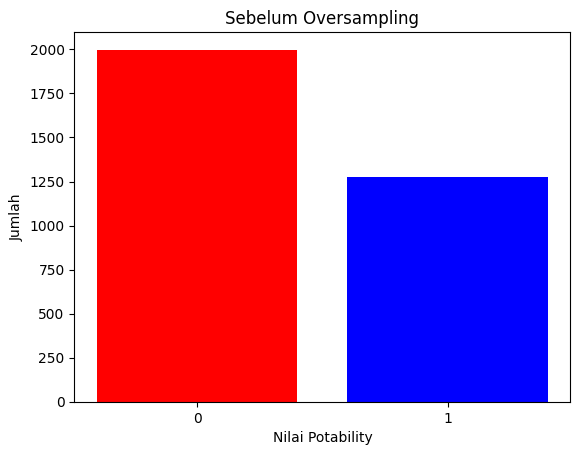

In [ ]:
# Hitung jumlah nilai 1 dan 0 dalam atribut potability
count_values = df['Potability'].value_counts()

# Buat diagram batang
plt.bar([0, 1], count_values.values, color=['red', 'blue'])

# Beri judul dan label sumbu
plt.title('Sebelum Oversampling')
plt.xlabel('Nilai Potability')
plt.ylabel('Jumlah')

# Atur label sumbu x
plt.xticks([0, 1], ['0', '1'])

# Tampilkan diagram
plt.show()


In [ ]:
X = df.drop(columns=['Potability'])
y = df['Potability']

# Inisialisasi objek SMOTE
smote = SMOTE()

# Terapkan SMOTE ke data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Gabungkan kembali fitur-fitur yang sudah di-resample dengan label target yang sudah di-resample
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

# Print jumlah sampel setelah oversampling
print("Jumlah sampel setelah oversampling:")
print(y_resampled.value_counts())

resampled_data.to_csv("water_oversampled.csv", index=False)

Jumlah sampel setelah oversampling:
Potability
0    1998
1    1998
Name: count, dtype: int64


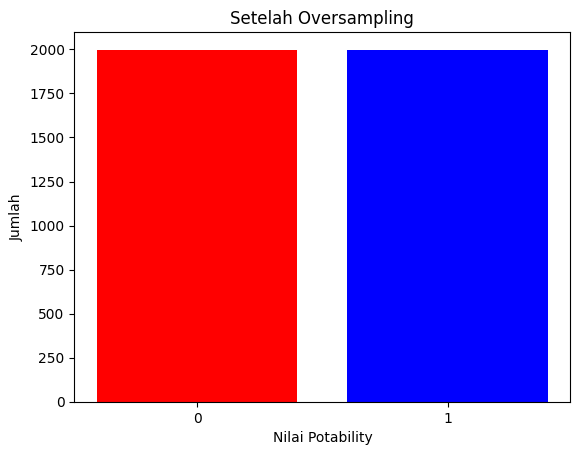

In [ ]:
# Hitung jumlah nilai 1 dan 0 dalam target setelah oversampling
count_values_resampled = y_resampled.value_counts()

# Buat diagram batang
plt.bar([0, 1], count_values_resampled.values, color=['red', 'blue'])

# Beri judul dan label sumbu
plt.title('Setelah Oversampling')
plt.xlabel('Nilai Potability')
plt.ylabel('Jumlah')

# Atur label sumbu x
plt.xticks([0, 1], ['0', '1'])

# Tampilkan diagram
plt.show()


### feature selection data oversampling

In [ ]:
df = pd.read_csv("water_oversampled.csv")

print(df.shape)

# Pisahkan fitur dan target
X = df.drop(columns=['Potability'])  # Fitur-fitur
y = df['Potability']  # Target

(3996, 10)


#### CHI2

In [ ]:
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)

# 5. Pilih fitur yang memiliki nilai Chi-square tertinggi sebagai fitur yang paling relevan.
chi2_scores = chi2_selector.scores_
selected_features = X.columns[chi2_scores.argsort()[::-1]]  # Mengurutkan fitur berdasarkan nilai Chi-square tertinggi.

# Tampilkan hasil seleksi fitur.
print("Fitur yang paling relevan dengan target 'Potability':")
print(selected_features)

Fitur yang paling relevan dengan target 'Potability':
Index(['Sulfate', 'Solids', 'Chloramines', 'Organic_carbon', 'Hardness',
       'Conductivity', 'Turbidity', 'Trihalomethanes', 'ph'],
      dtype='object')


#### SFS Random Forest

In [ ]:
model = RandomForestClassifier()

In [ ]:
# SFS Forward
sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
# SFS Backward
sfs = SFS(model,
          k_features='best',
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['Hardness', 'Conductivity', 'Turbidity', 'Trihalomethanes', 'Organic_carbon', 'Solids', 'Chloramines', 'Sulfate', 'ph']


#### SFS Naive Bayes

In [ ]:
model = GaussianNB()

In [ ]:
# SFS Forward
sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
# SFS Backward
sfs = SFS(model,
          k_features='best',
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['ph', 'Organic_carbon', 'Turbidity', 'Conductivity', 'Hardness', 'Trihalomethanes', 'Sulfate', 'Solids', 'Chloramines']


#### SFS Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# SFS Forward
sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
# SFS Backward
sfs = SFS(model,
          k_features='best',
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['Organic_carbon', 'Chloramines', 'Hardness', 'Conductivity', 'Sulfate', 'Solids', 'Turbidity', 'ph', 'Trihalomethanes']


#### SFS Decision Tree

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
# SFS Forward
sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
# SFS Backward
sfs = SFS(model,
          k_features='best',
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['Hardness', 'Turbidity', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Solids', 'Chloramines', 'Sulfate', 'ph']


#### SFS XGboost

In [ ]:
model = XGBClassifier()

In [ ]:
# SFS Forward
sfs = SFS(model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
# SFS Backward
sfs = SFS(model,
          k_features='best',
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=8)
sfs.fit(X, y)

# Mendapatkan informasi metrik untuk setiap kombinasi fitur
metric_dict = sfs.get_metric_dict()

# Mengumpulkan fitur yang dipilih dalam setiap langkah dan skornya
feature_ranks = []
for key in metric_dict.keys():
    feature_set = metric_dict[key]['feature_names']
    avg_score = metric_dict[key]['avg_score']
    for feature in feature_set:
        feature_ranks.append((feature, avg_score))

# Mengonversi menjadi DataFrame untuk pengurutan
feature_df = pd.DataFrame(feature_ranks, columns=['Feature', 'Score'])
feature_df = feature_df.drop_duplicates(subset='Feature', keep='last')
feature_df = feature_df.sort_values(by='Score', ascending=False)

# Mengambil nama fitur dalam urutan yang diinginkan
sorted_features = feature_df['Feature'].tolist()

# Tampilkan hasil
print("Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:")
print(sorted_features)

Fitur dalam urutan dari yang paling berpengaruh hingga yang paling tidak berpengaruh:
['Turbidity', 'Organic_carbon', 'Trihalomethanes', 'Chloramines', 'Solids', 'Conductivity', 'Hardness', 'Sulfate', 'ph']


#### RFE

In [ ]:
# RFE dengan RandomForest
model = RandomForestClassifier()

# Menggunakan RFE untuk seleksi fitur
selector = RFE(model, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

# Menampilkan fitur dari yang paling berpengaruh sampai yang tidak berpengaruh
ranked_features = [x for _,x in sorted(zip(selector.ranking_, X.columns))]
print(ranked_features)

['Solids', 'Hardness', 'Chloramines', 'ph', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
class GaussianNBWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.nb = GaussianNB()
        self.coef_ = None

    def fit(self, X, y):
        self.nb.fit(X, y)
        self.coef_ = self.nb.class_prior_
        return self

    def predict(self, X):
        return self.nb.predict(X)


# Inisialisasi wrapper untuk Naive Bayes
nb_wrapper = GaussianNBWrapper()

# Menggunakan RFE untuk seleksi fitur
selector = RFE(nb_wrapper, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

# Menampilkan fitur dari yang paling berpengaruh sampai yang tidak berpengaruh
ranked_features = [x for _,x in sorted(zip(selector.ranking_, X.columns))]
print(ranked_features)

['Turbidity', 'Trihalomethanes', 'Organic_carbon', 'Conductivity', 'Sulfate', 'Chloramines', 'Solids', 'Hardness', 'ph']


In [ ]:
# RFE dengan Logistic Regression
model = LogisticRegression()

# Inisialisasi RFE dengan model yang telah dibuat
rfe = RFE(model)

# Menggunakan RFE untuk seleksi fitur
selector = RFE(model, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

# Menampilkan fitur dari yang paling berpengaruh sampai yang tidak berpengaruh
ranked_features = [x for _,x in sorted(zip(selector.ranking_, X.columns))]
print(ranked_features)

['Solids', 'Chloramines', 'Organic_carbon', 'Sulfate', 'Conductivity', 'Hardness', 'Turbidity', 'Trihalomethanes', 'ph']


In [ ]:
# RFE dengan DecisionTree
model = DecisionTreeClassifier()

# Menggunakan RFE untuk seleksi fitur
selector = RFE(model, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

# Menampilkan fitur dari yang paling berpengaruh sampai yang tidak berpengaruh
ranked_features = [x for _,x in sorted(zip(selector.ranking_, X.columns))]
print(ranked_features)

['Chloramines', 'Hardness', 'Conductivity', 'Solids', 'ph', 'Sulfate', 'Turbidity', 'Trihalomethanes', 'Organic_carbon']


In [ ]:
# RFE dengan XGBoost
model = XGBClassifier()

# Menggunakan RFE untuk seleksi fitur
selector = RFE(model, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

# Menampilkan fitur dari yang paling berpengaruh sampai yang tidak berpengaruh
ranked_features = [x for _,x in sorted(zip(selector.ranking_, X.columns))]
print(ranked_features)

['ph', 'Sulfate', 'Chloramines', 'Hardness', 'Solids', 'Organic_carbon', 'Conductivity', 'Turbidity', 'Trihalomethanes']


# train and Evaluation

## Original Data

In [ ]:
data = pd.read_csv('data_preprocessed.csv')
data.shape

(3276, 10)

In [ ]:
# Pisahkan atribut dan target
X = data.drop('Potability', axis=1)  # Atribut
y = data['Potability']  # Target

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [ ]:
# Inisialisasi model Random Forest
model = RandomForestClassifier()

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[369  43]
 [162  82]]

Akurasi: 0.6875

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       412
           1       0.66      0.34      0.44       244

    accuracy                           0.69       656
   macro avg       0.68      0.62      0.61       656
weighted avg       0.68      0.69      0.66       656



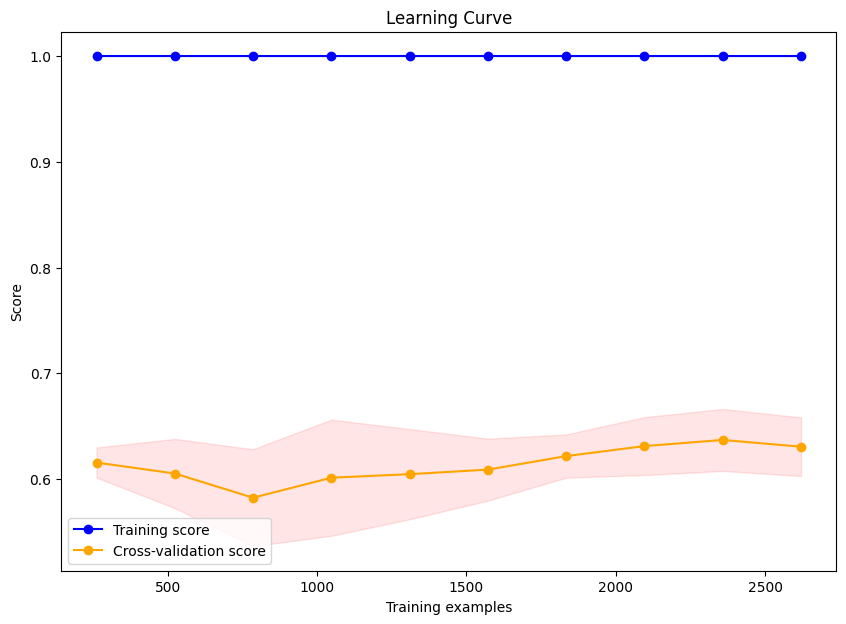

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Rata-rata dan standar deviasi untuk setiap ukuran dataset
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualisasi learning curve
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='red')
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

### Naive Bayes

In [ ]:
model = GaussianNB()

In [ ]:
# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_NB = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_NB)
print("\nConfusion Matrix:")
print(conf_matrix)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_NB)
print("\nAkurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_NB))


Confusion Matrix:
[[363  49]
 [202  42]]

Akurasi: 0.6173780487804879

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       412
           1       0.46      0.17      0.25       244

    accuracy                           0.62       656
   macro avg       0.55      0.53      0.50       656
weighted avg       0.58      0.62      0.56       656



### Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000)

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_LR = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_LR)
print("\nConfusion Matrix:")
print(conf_matrix)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_LR)
print("\nAkurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_LR))


Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGboost

In [ ]:
model = XGBClassifier()

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_XG = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_XG)
print("\nConfusion Matrix:")
print(conf_matrix)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_XG)
print("\nAkurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_XG))


Confusion Matrix:
[[322  90]
 [138 106]]

Akurasi: 0.6524390243902439

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       412
           1       0.54      0.43      0.48       244

    accuracy                           0.65       656
   macro avg       0.62      0.61      0.61       656
weighted avg       0.64      0.65      0.64       656



### Decision Tree

In [ ]:
model = DecisionTreeClassifier()

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_DT = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_DT)
print("\nConfusion Matrix:")
print(conf_matrix)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_DT)
print("\nAkurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_DT))


Confusion Matrix:
[[278 134]
 [129 115]]

Akurasi: 0.5990853658536586

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       412
           1       0.46      0.47      0.47       244

    accuracy                           0.60       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.60      0.60      0.60       656



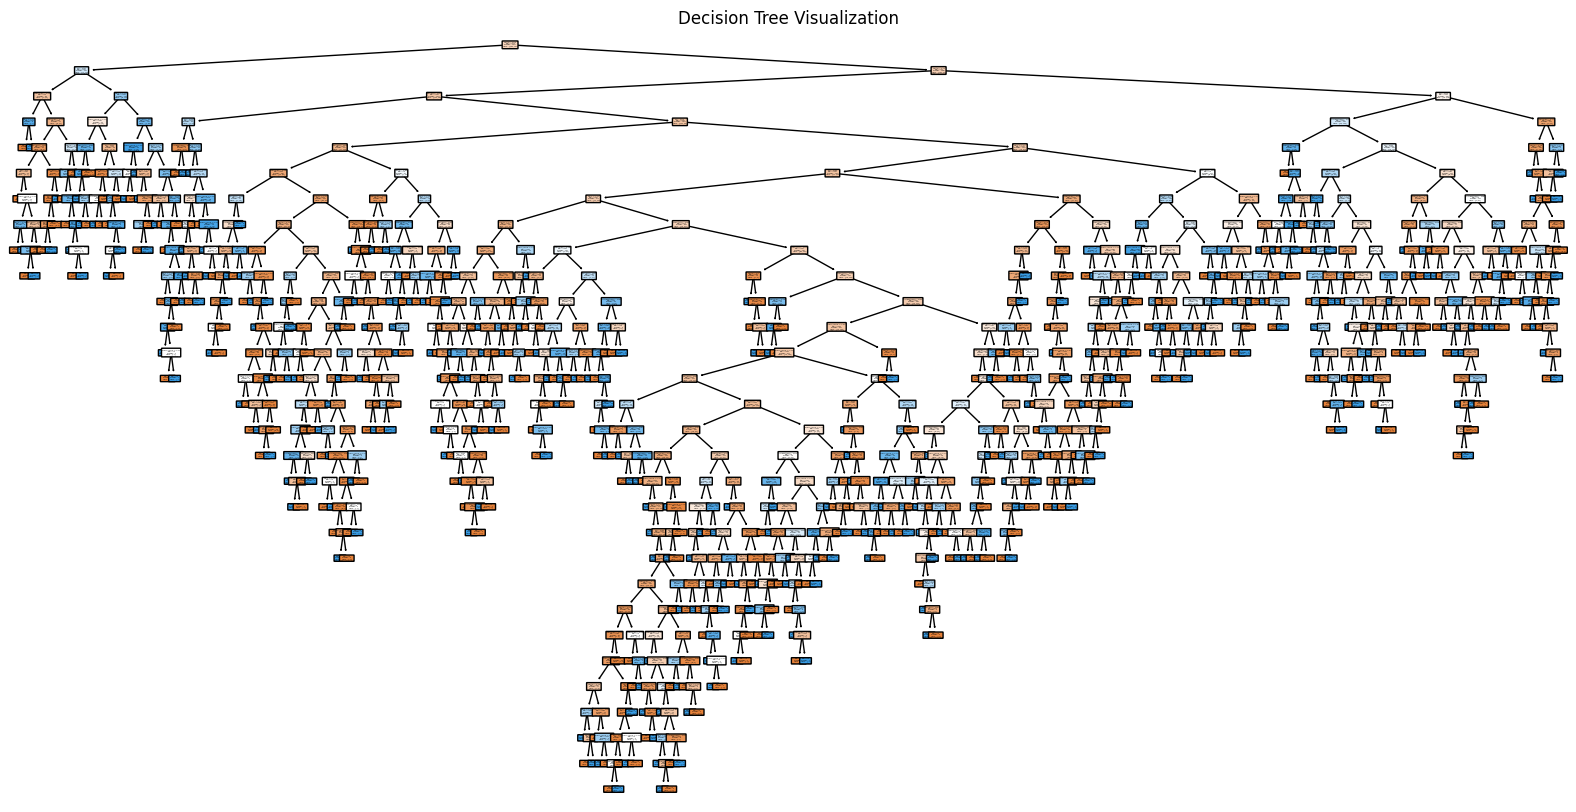

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

### Feature Selection Experiment chi2

In [ ]:
# Seleksi Fitur dengan CHI2 dan Algoritma Random Forest
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Solids', 'Organic_carbon', 'Chloramines', 'Sulfate', 'Hardness',  'Conductivity', 'Trihalomethanes', 'ph', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = RandomForestClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Solids']

Confusion Matrix:
[[257 155]
 [149  95]]

Akurasi: 0.5365853658536586

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       412
           1       0.38      0.39      0.38       244

    accuracy                           0.54       656
   macro avg       0.51      0.51      0.51       656
weighted avg       0.54      0.54      0.54       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Solids', 'Organic_carbon']

Confusion Matrix:
[[287 125]
 [174  70]]

Akurasi: 0.5442073170731707

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       412
           1       0.36      0.29      0.32       244

    accuracy                           0.54       656
   macro avg       0.49      0.49      0.49       656
w

In [ ]:
# Seleksi Fitur dengan CHI2 dan Algoritma Naive Bayes
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Solids', 'Organic_carbon', 'Chloramines', 'Sulfate', 'Hardness',  'Conductivity', 'Trihalomethanes', 'ph', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = GaussianNB()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Solids']

Confusion Matrix:
[[407   5]
 [240   4]]

Akurasi: 0.6265243902439024

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       412
           1       0.44      0.02      0.03       244

    accuracy                           0.63       656
   macro avg       0.54      0.50      0.40       656
weighted avg       0.56      0.63      0.49       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Solids', 'Organic_carbon']

Confusion Matrix:
[[408   4]
 [240   4]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       412
           1       0.50      0.02      0.03       244

    accuracy                           0.63       656
   macro avg       0.56      0.50      0.40       656
w

In [ ]:
# Seleksi Fitur dengan CHI2 dan Algoritma Logistic Regression
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Solids', 'Organic_carbon', 'Chloramines', 'Sulfate', 'Hardness',  'Conductivity', 'Trihalomethanes', 'ph', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = LogisticRegression()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Solids']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Solids', 'Organic_carbon']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
w

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

-------------------------------------------------------------

Iterasi 8 dengan fitur: ['Solids', 'Organic_carbon', 'Chloramines', 'Sulfate', 'Hardness', 'Conductivity', 'Trihalomethanes', 'ph']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

----------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
# Seleksi Fitur dengan CHI2 dan Decision Tree
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Solids', 'Organic_carbon', 'Chloramines', 'Sulfate', 'Hardness',  'Conductivity', 'Trihalomethanes', 'ph', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = DecisionTreeClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Solids']

Confusion Matrix:
[[257 155]
 [149  95]]

Akurasi: 0.5365853658536586

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       412
           1       0.38      0.39      0.38       244

    accuracy                           0.54       656
   macro avg       0.51      0.51      0.51       656
weighted avg       0.54      0.54      0.54       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Solids', 'Organic_carbon']

Confusion Matrix:
[[238 174]
 [149  95]]

Akurasi: 0.5076219512195121

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.61      0.58      0.60       412
           1       0.35      0.39      0.37       244

    accuracy                           0.51       656
   macro avg       0.48      0.48      0.48       656
w

In [ ]:
# Seleksi Fitur dengan CHI2 dan Algoritma XGBoost
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Solids', 'Organic_carbon', 'Chloramines', 'Sulfate', 'Hardness',  'Conductivity', 'Trihalomethanes', 'ph', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = XGBClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Solids']

Confusion Matrix:
[[342  70]
 [204  40]]

Akurasi: 0.5823170731707317

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      0.83      0.71       412
           1       0.36      0.16      0.23       244

    accuracy                           0.58       656
   macro avg       0.50      0.50      0.47       656
weighted avg       0.53      0.58      0.53       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Solids', 'Organic_carbon']

Confusion Matrix:
[[301 111]
 [186  58]]

Akurasi: 0.5472560975609756

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       412
           1       0.34      0.24      0.28       244

    accuracy                           0.55       656
   macro avg       0.48      0.48      0.48       656
w

### SFS Forward Selection

In [ ]:
# Seleksi Fitur dengan SFS Forward dan Algoritma Random Forest
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = RandomForestClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[282 130]
 [164  80]]

Akurasi: 0.551829268292683

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      0.68      0.66       412
           1       0.38      0.33      0.35       244

    accuracy                           0.55       656
   macro avg       0.51      0.51      0.50       656
weighted avg       0.54      0.55      0.54       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Hardness']

Confusion Matrix:
[[265 147]
 [149  95]]

Akurasi: 0.5487804878048781

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       412
           1       0.39      0.39      0.39       244

    accuracy                           0.55       656
   macro avg       0.52      0.52      0.52       656
weighted avg    

In [ ]:
# Seleksi Fitur dengan SFS Forward dan Algoritma Naive Bayes
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = GaussianNB()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Hardness']

Confusion Matrix:
[[399  13]
 [238   6]]

Akurasi: 0.6173780487804879

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      0.97      0.76       412
           1       0.32      0.02      0.05       244

    accuracy                           0.62       656
   macro avg       0.47      0.50      0.40       656
weighted avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-------------------------------------------------------------

Iterasi 8 dengan fitur: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes']

Confusion Matrix:
[[363  49]
 [202  42]]

Akurasi: 0.6173780487804879

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       412
           1       0.46      0.17      0.25       244

    accuracy                           0.62       656
   macro avg       0.55      0.53      0.50       656
weighted avg       0.58      0.62      0.56       656

-------------------------------------------------------------

Iterasi 9 dengan fitur: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

Confusion Matrix:
[[363  49]
 [202  42]]

Akurasi: 0.6173780487804879

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.64      

In [ ]:
# Seleksi Fitur dengan SFS Forward dan Algoritma Logistic Regression
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = LogisticRegression()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Hardness']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

-------------------------------------------------------------

Iterasi 6 dengan fitur: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

-------------------------------------------------------------

Iterasi 7 dengan fitur: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

-------------------------------------------------------------

Iterasi 9 dengan fitur: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Seleksi Fitur dengan SFS Forward dan Algoritma Decision Tree
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = DecisionTreeClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[282 130]
 [164  80]]

Akurasi: 0.551829268292683

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      0.68      0.66       412
           1       0.38      0.33      0.35       244

    accuracy                           0.55       656
   macro avg       0.51      0.51      0.50       656
weighted avg       0.54      0.55      0.54       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Hardness']

Confusion Matrix:
[[256 156]
 [139 105]]

Akurasi: 0.5503048780487805

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.65      0.62      0.63       412
           1       0.40      0.43      0.42       244

    accuracy                           0.55       656
   macro avg       0.53      0.53      0.53       656
weighted avg    

In [ ]:
# Seleksi Fitur dengan SFS Forward dan Algoritma XGBoost
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = XGBClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[346  66]
 [211  33]]

Akurasi: 0.5777439024390244

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.62      0.84      0.71       412
           1       0.33      0.14      0.19       244

    accuracy                           0.58       656
   macro avg       0.48      0.49      0.45       656
weighted avg       0.51      0.58      0.52       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Hardness']

Confusion Matrix:
[[296 116]
 [169  75]]

Akurasi: 0.5655487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       412
           1       0.39      0.31      0.34       244

    accuracy                           0.57       656
   macro avg       0.51      0.51      0.51       656
weighted avg   

### SFS Backward

In [ ]:
# Seleksi Fitur dengan SFS Backward dan Algoritma Random Forest
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Chloramines', 'Turbidity', 'Organic_carbon', 'Conductivity', 'Hardness', 'Trihalomethanes', 'Solids', 'ph', 'Sulfate']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = RandomForestClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Chloramines']

Confusion Matrix:
[[252 160]
 [152  92]]

Akurasi: 0.524390243902439

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.62      0.61      0.62       412
           1       0.37      0.38      0.37       244

    accuracy                           0.52       656
   macro avg       0.49      0.49      0.49       656
weighted avg       0.53      0.52      0.53       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Chloramines', 'Turbidity']

Confusion Matrix:
[[298 114]
 [177  67]]

Akurasi: 0.5564024390243902

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       412
           1       0.37      0.27      0.32       244

    accuracy                           0.56       656
   macro avg       0.50      0.50      0.49       6

In [ ]:
# Seleksi Fitur dengan SFS Backward dan Algoritma Naive Bayes
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Sulfate', 'Organic_carbon', 'ph', 'Turbidity', 'Solids', 'Trihalomethanes', 'Conductivity', 'Chloramines', 'Hardness']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = GaussianNB()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Sulfate']

Confusion Matrix:
[[382  30]
 [203  41]]

Akurasi: 0.6448170731707317

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.65      0.93      0.77       412
           1       0.58      0.17      0.26       244

    accuracy                           0.64       656
   macro avg       0.62      0.55      0.51       656
weighted avg       0.62      0.64      0.58       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Sulfate', 'Organic_carbon']

Confusion Matrix:
[[381  31]
 [204  40]]

Akurasi: 0.6417682926829268

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       412
           1       0.56      0.16      0.25       244

    accuracy                           0.64       656
   macro avg       0.61      0.54      0.51       656

In [ ]:
# Seleksi Fitur dengan SFS Backward dan Algoritma Logistic Regression
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Hardness', 'Conductivity', 'Sulfate', 'Turbidity', 'Trihalomethanes', 'Organic_carbon', 'Chloramines', 'Solids', 'ph']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = LogisticRegression()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Hardness']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Hardness', 'Conductivity']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif



Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

-------------------------------------------------------------

Iterasi 8 dengan fitur: ['Hardness', 'Conductivity', 'Sulfate', 'Turbidity', 'Trihalomethanes', 'Organic_carbon', 'Chloramines', 'Solids']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
# Seleksi Fitur dengan SFS Backward dan Algoritma Decision Tree
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Trihalomethanes', 'Turbidity', 'Organic_carbon', 'Hardness', 'Solids', 'Conductivity', 'ph', 'Sulfate', 'Chloramines']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = DecisionTreeClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Trihalomethanes']

Confusion Matrix:
[[259 153]
 [161  83]]

Akurasi: 0.5213414634146342

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       412
           1       0.35      0.34      0.35       244

    accuracy                           0.52       656
   macro avg       0.48      0.48      0.48       656
weighted avg       0.52      0.52      0.52       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Trihalomethanes', 'Turbidity']

Confusion Matrix:
[[244 168]
 [147  97]]

Akurasi: 0.5198170731707317

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61       412
           1       0.37      0.40      0.38       244

    accuracy                           0.52       656
   macro avg       0.50      0.49      0.4

In [ ]:
# Seleksi Fitur dengan SFS Backward dan Algoritma XGBoost
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Solids', 'Organic_carbon', 'Conductivity', 'Chloramines', 'Turbidity', 'Trihalomethanes', 'Hardness', 'Sulfate', 'ph']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = XGBClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Solids']

Confusion Matrix:
[[342  70]
 [204  40]]

Akurasi: 0.5823170731707317

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      0.83      0.71       412
           1       0.36      0.16      0.23       244

    accuracy                           0.58       656
   macro avg       0.50      0.50      0.47       656
weighted avg       0.53      0.58      0.53       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Solids', 'Organic_carbon']

Confusion Matrix:
[[301 111]
 [186  58]]

Akurasi: 0.5472560975609756

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       412
           1       0.34      0.24      0.28       244

    accuracy                           0.55       656
   macro avg       0.48      0.48      0.48       656
w

### RFE

In [ ]:
# Seleksi Fitur dengan RFE dan Algoritma Random Forest
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Hardness', 'Solids', 'Chloramines', 'ph', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Turbidity', 'Trihalomethanes']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = RandomForestClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Hardness']

Confusion Matrix:
[[250 162]
 [128 116]]

Akurasi: 0.5579268292682927

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63       412
           1       0.42      0.48      0.44       244

    accuracy                           0.56       656
   macro avg       0.54      0.54      0.54       656
weighted avg       0.57      0.56      0.56       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Hardness', 'Solids']

Confusion Matrix:
[[291 121]
 [176  68]]

Akurasi: 0.5472560975609756

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.62      0.71      0.66       412
           1       0.36      0.28      0.31       244

    accuracy                           0.55       656
   macro avg       0.49      0.49      0.49       656
weigh

In [ ]:
# Seleksi Fitur dengan RFE dan Algoritma Naive Bayes
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Turbidity', 'Trihalomethanes', 'Organic_carbon', 'Conductivity', 'Sulfate', 'Chloramines', 'Solids', 'Hardness']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = GaussianNB()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Turbidity']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

0.6173780487804879

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       412
           1       0.46      0.17      0.25       244

    accuracy                           0.62       656
   macro avg       0.55      0.53      0.50       656
weighted avg       0.58      0.62      0.56       656



In [ ]:
# Seleksi Fitur dengan RFE dan Algoritma Logistic Regression
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Solids', 'Organic_carbon', 'Chloramines', 'Hardness', 'Sulfate', 'Conductivity', 'Trihalomethanes', 'ph', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = LogisticRegression()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Solids']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Solids', 'Organic_carbon']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
w

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

-------------------------------------------------------------

Iterasi 5 dengan fitur: ['Solids', 'Organic_carbon', 'Chloramines', 'Hardness', 'Sulfate']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

-------------------------------------------------------------

Iterasi 6 dengan fitur: ['Solids', 'Organic_carbon', 'Chloramines', 'Hardness', 'Sulfate', 'Conductivity']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

-------------------------------------------------------------

Iterasi 8 dengan fitur: ['Solids', 'Organic_carbon', 'Chloramines', 'Hardness', 'Sulfate', 'Conductivity', 'Trihalomethanes', 'ph']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

-------------------------------------------------------------

Iterasi 9 dengan fitur: ['Solids', 'Organic_carbon', 'Chloramines', 'Hardness', 'Sulfate', 'Conductivity', 'Trihalomethanes', 'ph', 'Turbidity']

Confusion Matrix:
[[412   0]
 [244   0]]

Akurasi: 0.6280487804878049

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.63      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
# Seleksi Fitur dengan RFE dan Algoritma Decision Tree
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Hardness', 'Solids', 'Chloramines', 'ph', 'Turbidity', 'Sulfate', 'Trihalomethanes', 'Conductivity', 'Organic_carbon']
# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = DecisionTreeClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Hardness']

Confusion Matrix:
[[251 161]
 [128 116]]

Akurasi: 0.5594512195121951

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63       412
           1       0.42      0.48      0.45       244

    accuracy                           0.56       656
   macro avg       0.54      0.54      0.54       656
weighted avg       0.57      0.56      0.56       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Hardness', 'Solids']

Confusion Matrix:
[[245 167]
 [147  97]]

Akurasi: 0.5213414634146342

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61       412
           1       0.37      0.40      0.38       244

    accuracy                           0.52       656
   macro avg       0.50      0.50      0.50       656
weigh

In [ ]:
# Seleksi Fitur dengan RFE dan Algoritma XGBoost
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Sulfate', 'Chloramines', 'Hardness', 'Solids', 'Organic_carbon', 'Trihalomethanes', 'Conductivity', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = XGBClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[346  66]
 [211  33]]

Akurasi: 0.5777439024390244

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.62      0.84      0.71       412
           1       0.33      0.14      0.19       244

    accuracy                           0.58       656
   macro avg       0.48      0.49      0.45       656
weighted avg       0.51      0.58      0.52       656

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Sulfate']

Confusion Matrix:
[[321  91]
 [165  79]]

Akurasi: 0.6097560975609756

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.66      0.78      0.71       412
           1       0.46      0.32      0.38       244

    accuracy                           0.61       656
   macro avg       0.56      0.55      0.55       656
weighted avg    

## Resampled Data

In [ ]:
df_over = pd.read_csv("water_oversampled.csv")
df_over.shape

(3996, 10)

In [ ]:
# Pisahkan atribut dan target
X = df_over.drop('Potability', axis=1)  # Atribut
y = df_over['Potability']  # Target

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### random Forest

In [ ]:
# Inisialisasi model Random Forest
model = RandomForestClassifier()

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[302  92]
 [112 294]]

Akurasi: 0.745

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       394
           1       0.76      0.72      0.74       406

    accuracy                           0.74       800
   macro avg       0.75      0.75      0.74       800
weighted avg       0.75      0.74      0.74       800



### naive bayes

In [ ]:
model = GaussianNB()

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_NB = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_NB)
print("\nConfusion Matrix:")
print(conf_matrix)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_NB)
print("\nAkurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_NB))


Confusion Matrix:
[[235 159]
 [208 198]]

Akurasi: 0.54125

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.53      0.60      0.56       394
           1       0.55      0.49      0.52       406

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.54      0.54       800



### Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000)

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_LR = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_LR)
print("\nConfusion Matrix:")
print(conf_matrix)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_LR)
print("\nAkurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_LR))


Confusion Matrix:
[[224 170]
 [219 187]]

Akurasi: 0.51375

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.51      0.57      0.54       394
           1       0.52      0.46      0.49       406

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800



### XGboost

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_XG = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_XG)
print("\nConfusion Matrix:")
print(conf_matrix)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_XG)
print("\nAkurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_XG))


Confusion Matrix:
[[280 114]
 [129 277]]

Akurasi: 0.69625

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       394
           1       0.71      0.68      0.70       406

    accuracy                           0.70       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.70      0.70       800



### Decision Tree

In [ ]:
model = DecisionTreeClassifier()

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_DT = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_DT)
print("\nConfusion Matrix:")
print(conf_matrix)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_DT)
print("\nAkurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_DT))


Confusion Matrix:
[[253 141]
 [140 266]]

Akurasi: 0.64875

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       394
           1       0.65      0.66      0.65       406

    accuracy                           0.65       800
   macro avg       0.65      0.65      0.65       800
weighted avg       0.65      0.65      0.65       800



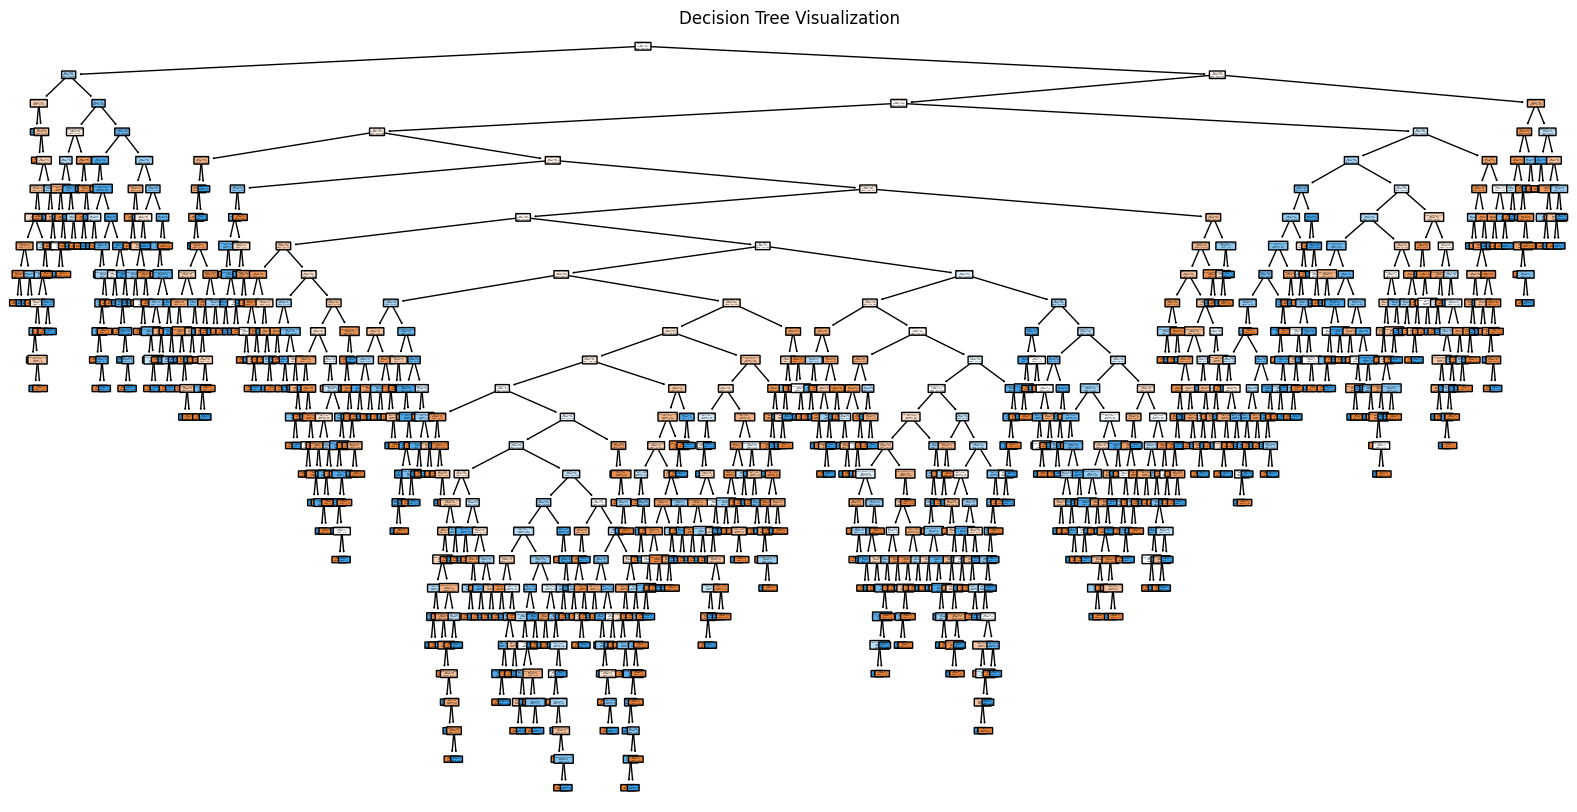

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

### Feature Selection Experiment chi2

In [ ]:
data = pd.read_csv('water_oversampled.csv')
data.shape

(3996, 10)

In [ ]:
# Pisahkan atribut dan target
X = data.drop('Potability', axis=1)  # Atribut
y = data['Potability']  # Target

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Seleksi Fitur dengan CHI2 dan Algoritma Random Forest
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Sulfate', 'Solids', 'Chloramines', 'Organic_carbon', 'Hardness',
       'Conductivity', 'Turbidity', 'Trihalomethanes', 'ph']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = RandomForestClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Sulfate']

Confusion Matrix:
[[237 157]
 [215 191]]

Akurasi: 0.535

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.52      0.60      0.56       394
           1       0.55      0.47      0.51       406

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.53       800
weighted avg       0.54      0.54      0.53       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Sulfate', 'Solids']

Confusion Matrix:
[[220 174]
 [183 223]]

Akurasi: 0.55375

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       394
           1       0.56      0.55      0.56       406

    accuracy                           0.55       800
   macro avg       0.55      0.55      0.55       800
weighted avg       0.55      0.

In [ ]:
# Seleksi Fitur dengan CHI2 dan Algoritma Naive Bayes
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Sulfate', 'Solids', 'Chloramines', 'Organic_carbon', 'Hardness',
       'Conductivity', 'Turbidity', 'Trihalomethanes', 'ph']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = GaussianNB()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Sulfate']

Confusion Matrix:
[[278 116]
 [251 155]]

Akurasi: 0.54125

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.53      0.71      0.60       394
           1       0.57      0.38      0.46       406

    accuracy                           0.54       800
   macro avg       0.55      0.54      0.53       800
weighted avg       0.55      0.54      0.53       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Sulfate', 'Solids']

Confusion Matrix:
[[274 120]
 [246 160]]

Akurasi: 0.5425

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.53      0.70      0.60       394
           1       0.57      0.39      0.47       406

    accuracy                           0.54       800
   macro avg       0.55      0.54      0.53       800
weighted avg       0.55      0

In [ ]:
# Seleksi Fitur dengan CHI2 dan Algoritma Logistic Regression
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Sulfate', 'Solids', 'Chloramines', 'Organic_carbon', 'Hardness',
       'Conductivity', 'Turbidity', 'Trihalomethanes', 'ph']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = LogisticRegression()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Sulfate']

Confusion Matrix:
[[252 142]
 [241 165]]

Akurasi: 0.52125

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.51      0.64      0.57       394
           1       0.54      0.41      0.46       406

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.52      0.52      0.51       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Sulfate', 'Solids']

Confusion Matrix:
[[229 165]
 [223 183]]

Akurasi: 0.515

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.51      0.58      0.54       394
           1       0.53      0.45      0.49       406

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.51       800
weighted avg       0.52      0.

In [ ]:
# Seleksi Fitur dengan CHI2 dan Decision Tree
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Sulfate', 'Solids', 'Chloramines', 'Organic_carbon', 'Hardness',
       'Conductivity', 'Turbidity', 'Trihalomethanes', 'ph']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = DecisionTreeClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Sulfate']

Confusion Matrix:
[[237 157]
 [215 191]]

Akurasi: 0.535

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.52      0.60      0.56       394
           1       0.55      0.47      0.51       406

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.53       800
weighted avg       0.54      0.54      0.53       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Sulfate', 'Solids']

Confusion Matrix:
[[213 181]
 [188 218]]

Akurasi: 0.53875

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.53      0.54      0.54       394
           1       0.55      0.54      0.54       406

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.

In [ ]:
# Seleksi Fitur dengan CHI2 dan Algoritma XGBoost
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Sulfate', 'Solids', 'Chloramines', 'Organic_carbon', 'Hardness',
       'Conductivity', 'Turbidity', 'Trihalomethanes', 'ph']
# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = XGBClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Sulfate']

Confusion Matrix:
[[226 168]
 [204 202]]

Akurasi: 0.535

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       394
           1       0.55      0.50      0.52       406

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.53       800
weighted avg       0.54      0.54      0.53       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Sulfate', 'Solids']

Confusion Matrix:
[[220 174]
 [202 204]]

Akurasi: 0.53

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       394
           1       0.54      0.50      0.52       406

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.53       800
weighted avg       0.53      0.53 

### SFS Forward Selection

In [ ]:
# Seleksi Fitur dengan SFS Forward dan Algoritma Random Forest
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = RandomForestClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[239 155]
 [214 192]]

Akurasi: 0.53875

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.53      0.61      0.56       394
           1       0.55      0.47      0.51       406

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.54      0.54       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Hardness']

Confusion Matrix:
[[199 195]
 [199 207]]

Akurasi: 0.5075

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.50      0.51      0.50       394
           1       0.51      0.51      0.51       406

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51     

In [ ]:
# Seleksi Fitur dengan SFS Forward dan Algoritma Naive Bayes
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = GaussianNB()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[140 254]
 [ 99 307]]

Akurasi: 0.55875

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.59      0.36      0.44       394
           1       0.55      0.76      0.63       406

    accuracy                           0.56       800
   macro avg       0.57      0.56      0.54       800
weighted avg       0.57      0.56      0.54       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Hardness']

Confusion Matrix:
[[156 238]
 [108 298]]

Akurasi: 0.5675

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.59      0.40      0.47       394
           1       0.56      0.73      0.63       406

    accuracy                           0.57       800
   macro avg       0.57      0.56      0.55       800
weighted avg       0.57      0.57     

In [ ]:
# Seleksi Fitur dengan SFS Forward dan Algoritma Logistic Regression
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = LogisticRegression()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[284 110]
 [314  92]]

Akurasi: 0.47

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.47      0.72      0.57       394
           1       0.46      0.23      0.30       406

    accuracy                           0.47       800
   macro avg       0.47      0.47      0.44       800
weighted avg       0.47      0.47      0.44       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Hardness']

Confusion Matrix:
[[234 160]
 [258 148]]

Akurasi: 0.4775

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.48      0.59      0.53       394
           1       0.48      0.36      0.41       406

    accuracy                           0.48       800
   macro avg       0.48      0.48      0.47       800
weighted avg       0.48      0.48      0.

In [ ]:
# Seleksi Fitur dengan SFS Forward dan Algoritma Decision Tree
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = DecisionTreeClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[239 155]
 [214 192]]

Akurasi: 0.53875

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.53      0.61      0.56       394
           1       0.55      0.47      0.51       406

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.54      0.54       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Hardness']

Confusion Matrix:
[[216 178]
 [205 201]]

Akurasi: 0.52125

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.51      0.55      0.53       394
           1       0.53      0.50      0.51       406

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.52      0.52    

In [ ]:
# Seleksi Fitur dengan SFS Forward dan Algoritma XGBoost
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = XGBClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[221 173]
 [178 228]]

Akurasi: 0.56125

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.55      0.56      0.56       394
           1       0.57      0.56      0.57       406

    accuracy                           0.56       800
   macro avg       0.56      0.56      0.56       800
weighted avg       0.56      0.56      0.56       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Hardness']

Confusion Matrix:
[[220 174]
 [180 226]]

Akurasi: 0.5575

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       394
           1       0.56      0.56      0.56       406

    accuracy                           0.56       800
   macro avg       0.56      0.56      0.56       800
weighted avg       0.56      0.56     

### SFS Backward

In [ ]:
# Seleksi Fitur dengan SFS Backward dan Algoritma Random Forest
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Hardness', 'Conductivity', 'Turbidity', 'Organic_carbon', 'Solids', 'Trihalomethanes', 'Chloramines', 'Sulfate', 'ph']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = RandomForestClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Hardness']

Confusion Matrix:
[[173 221]
 [205 201]]

Akurasi: 0.4675

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.46      0.44      0.45       394
           1       0.48      0.50      0.49       406

    accuracy                           0.47       800
   macro avg       0.47      0.47      0.47       800
weighted avg       0.47      0.47      0.47       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Hardness', 'Conductivity']

Confusion Matrix:
[[199 195]
 [214 192]]

Akurasi: 0.48875

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       394
           1       0.50      0.47      0.48       406

    accuracy                           0.49       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.4

In [ ]:
# Seleksi Fitur dengan SFS Backward dan Algoritma Naive Bayes
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Organic_carbon', 'Turbidity', 'Conductivity', 'Hardness', 'Trihalomethanes', 'Sulfate', 'Solids', 'Chloramines']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = GaussianNB()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[140 254]
 [ 99 307]]

Akurasi: 0.55875

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.59      0.36      0.44       394
           1       0.55      0.76      0.63       406

    accuracy                           0.56       800
   macro avg       0.57      0.56      0.54       800
weighted avg       0.57      0.56      0.54       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Organic_carbon']

Confusion Matrix:
[[146 248]
 [126 280]]

Akurasi: 0.5325

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.54      0.37      0.44       394
           1       0.53      0.69      0.60       406

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.52       800
weighted avg       0.53      0.5

In [ ]:
# Seleksi Fitur dengan SFS Backward dan Algoritma Logistic Regression
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Organic_carbon', 'Chloramines', 'Hardness', 'Conductivity', 'Sulfate', 'Solids', 'Turbidity', 'ph', 'Trihalomethanes']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = LogisticRegression()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Organic_carbon']

Confusion Matrix:
[[218 176]
 [229 177]]

Akurasi: 0.49375

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.49      0.55      0.52       394
           1       0.50      0.44      0.47       406

    accuracy                           0.49       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.49      0.49      0.49       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Organic_carbon', 'Chloramines']

Confusion Matrix:
[[230 164]
 [233 173]]

Akurasi: 0.50375

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54       394
           1       0.51      0.43      0.47       406

    accuracy                           0.50       800
   macro avg       0.51      0.50      0.50       800
weighted a

In [ ]:
# Seleksi Fitur dengan SFS Backward dan Algoritma Decision Tree
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Solids', 'Turbidity', 'Trihalomethanes', 'Organic_carbon', 'Conductivity', 'Hardness', 'Chloramines', 'Sulfate', 'ph']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = DecisionTreeClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Solids']

Confusion Matrix:
[[205 189]
 [212 194]]

Akurasi: 0.49875

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.49      0.52      0.51       394
           1       0.51      0.48      0.49       406

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Solids', 'Turbidity']

Confusion Matrix:
[[208 186]
 [215 191]]

Akurasi: 0.49875

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51       394
           1       0.51      0.47      0.49       406

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50     

In [ ]:
# Seleksi Fitur dengan SFS Backward dan Algoritma XGBoost
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Turbidity', 'Organic_carbon', 'Trihalomethanes', 'Chloramines', 'Solids', 'Conductivity', 'Hardness', 'Sulfate', 'ph']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = XGBClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Turbidity']

Confusion Matrix:
[[197 197]
 [203 203]]

Akurasi: 0.5

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50       394
           1       0.51      0.50      0.50       406

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Turbidity', 'Organic_carbon']

Confusion Matrix:
[[206 188]
 [191 215]]

Akurasi: 0.52625

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       394
           1       0.53      0.53      0.53       406

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.53       800
weighted avg       0.

### RFE

In [ ]:
# Seleksi Fitur dengan RFE dan Algoritma Random Forest
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Hardness', 'Solids', 'Chloramines', 'ph', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = RandomForestClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Hardness']

Confusion Matrix:
[[172 222]
 [205 201]]

Akurasi: 0.46625

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.46      0.44      0.45       394
           1       0.48      0.50      0.48       406

    accuracy                           0.47       800
   macro avg       0.47      0.47      0.47       800
weighted avg       0.47      0.47      0.47       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Hardness', 'Solids']

Confusion Matrix:
[[206 188]
 [194 212]]

Akurasi: 0.5225

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       394
           1       0.53      0.52      0.53       406

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.52     

In [ ]:
# Seleksi Fitur dengan RFE dan Algoritma Naive Bayes
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Turbidity', 'Trihalomethanes', 'Organic_carbon', 'Conductivity', 'Sulfate', 'Chloramines', 'Solids', 'Hardness', 'ph']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = GaussianNB()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Turbidity']

Confusion Matrix:
[[151 243]
 [150 256]]

Akurasi: 0.50875

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43       394
           1       0.51      0.63      0.57       406

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.50       800
weighted avg       0.51      0.51      0.50       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Turbidity', 'Trihalomethanes']

Confusion Matrix:
[[169 225]
 [169 237]]

Akurasi: 0.5075

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       394
           1       0.51      0.58      0.55       406

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.50       800
weighted avg     

In [ ]:
# Seleksi Fitur dengan RFE dan Algoritma Logistic Regression
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Solids', 'Chloramines', 'Organic_carbon', 'Sulfate', 'Conductivity', 'Hardness', 'Turbidity', 'Trihalomethanes', 'ph']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = LogisticRegression()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Solids']

Confusion Matrix:
[[239 155]
 [259 147]]

Akurasi: 0.4825

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.48      0.61      0.54       394
           1       0.49      0.36      0.42       406

    accuracy                           0.48       800
   macro avg       0.48      0.48      0.48       800
weighted avg       0.48      0.48      0.47       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Solids', 'Chloramines']

Confusion Matrix:
[[220 174]
 [238 168]]

Akurasi: 0.485

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.48      0.56      0.52       394
           1       0.49      0.41      0.45       406

    accuracy                           0.48       800
   macro avg       0.49      0.49      0.48       800
weighted avg       0.49      

In [ ]:
# Seleksi Fitur dengan RFE dan Algoritma Decision Tree
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['Chloramines', 'Conductivity', 'Hardness', 'Solids', 'ph', 'Sulfate', 'Trihalomethanes', 'Turbidity', 'Organic_carbon']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = DecisionTreeClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['Chloramines']

Confusion Matrix:
[[204 190]
 [212 194]]

Akurasi: 0.4975

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.49      0.52      0.50       394
           1       0.51      0.48      0.49       406

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['Chloramines', 'Conductivity']

Confusion Matrix:
[[199 195]
 [207 199]]

Akurasi: 0.4975

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       394
           1       0.51      0.49      0.50       406

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg     

In [ ]:
# Seleksi Fitur dengan RFE dan Algoritma XGBoost
# Daftar fitur berdasarkan urutan paling berpengaruh hingga tidak berpengaruh
selected_features = ['ph', 'Sulfate', 'Chloramines', 'Hardness', 'Solids', 'Organic_carbon', 'Conductivity', 'Turbidity', 'Trihalomethanes']

# Pisahkan target
y = data['Potability']

for i in range(1, len(selected_features) + 1):
    # Pilih subset fitur
    X = data[selected_features[:i]]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model
    model = XGBClassifier()

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nIterasi {i} dengan fitur: {selected_features[:i]}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAkurasi:", accuracy)

    # Laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

-------------------------------------------------------------

Iterasi 1 dengan fitur: ['ph']

Confusion Matrix:
[[221 173]
 [178 228]]

Akurasi: 0.56125

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.55      0.56      0.56       394
           1       0.57      0.56      0.57       406

    accuracy                           0.56       800
   macro avg       0.56      0.56      0.56       800
weighted avg       0.56      0.56      0.56       800

-------------------------------------------------------------

Iterasi 2 dengan fitur: ['ph', 'Sulfate']

Confusion Matrix:
[[245 149]
 [174 232]]

Akurasi: 0.59625

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       394
           1       0.61      0.57      0.59       406

    accuracy                           0.60       800
   macro avg       0.60      0.60      0.60       800
weighted avg       0.60      0.60     

# Best Model

In [ ]:
data = pd.read_csv('data_preprocessed.csv')

# Pisahkan atribut dan target
X = data[['Hardness', 'Solids', 'Chloramines', 'ph', 'Sulfate', 'Conductivity']]
y = data['Potability']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
model = RandomForestClassifier()

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[356  56]
 [152  92]]

Akurasi: 0.6829268292682927

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       412
           1       0.62      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.66      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656



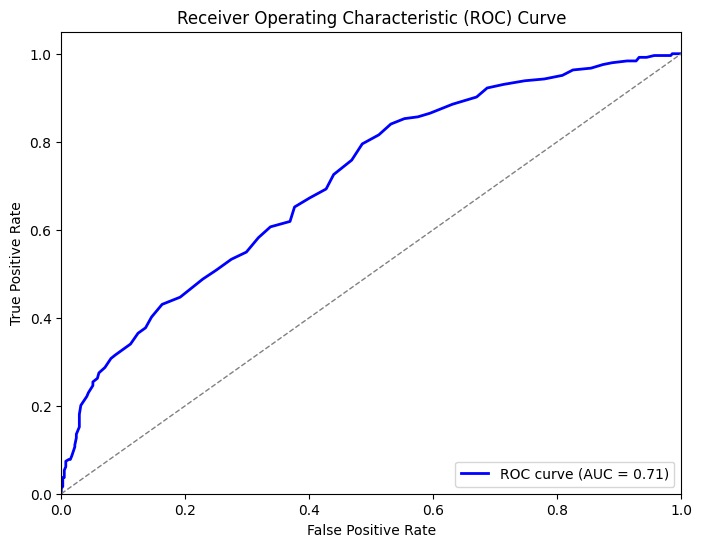

In [ ]:
# Lakukan prediksi probabilitas pada data uji
y_prob = model.predict_proba(X_test)[:, 1]

# Hitung False Positive Rate (FPR) dan True Positive Rate (TPR) menggunakan roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Hitung Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

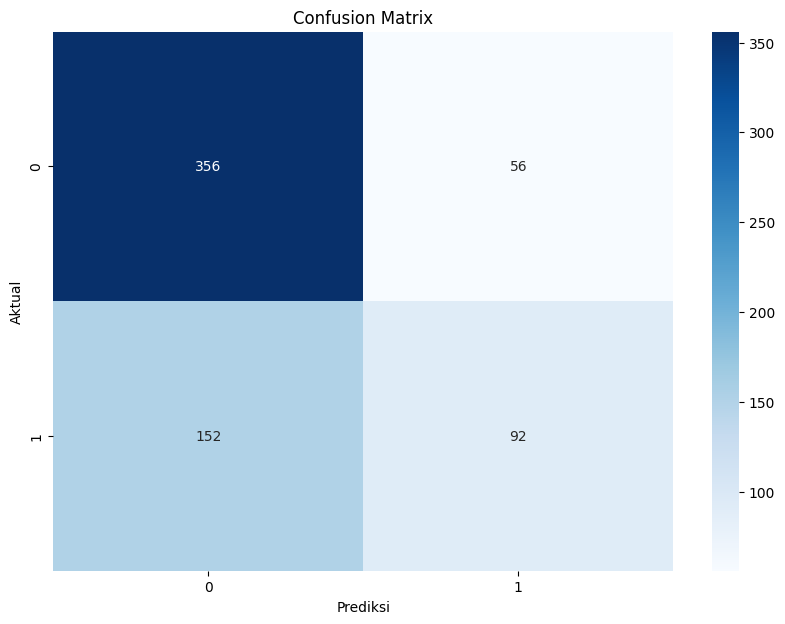

In [ ]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


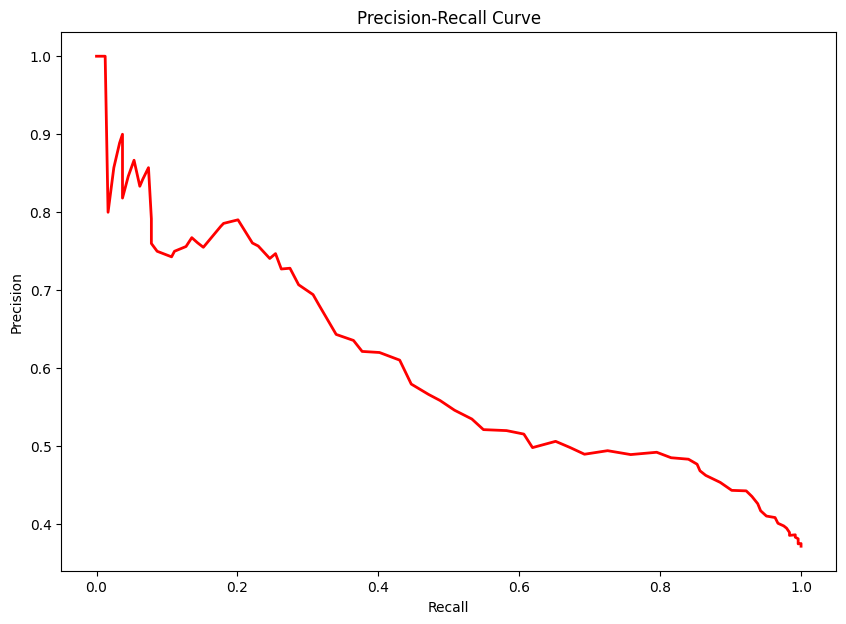

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Visualisasi precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='red', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

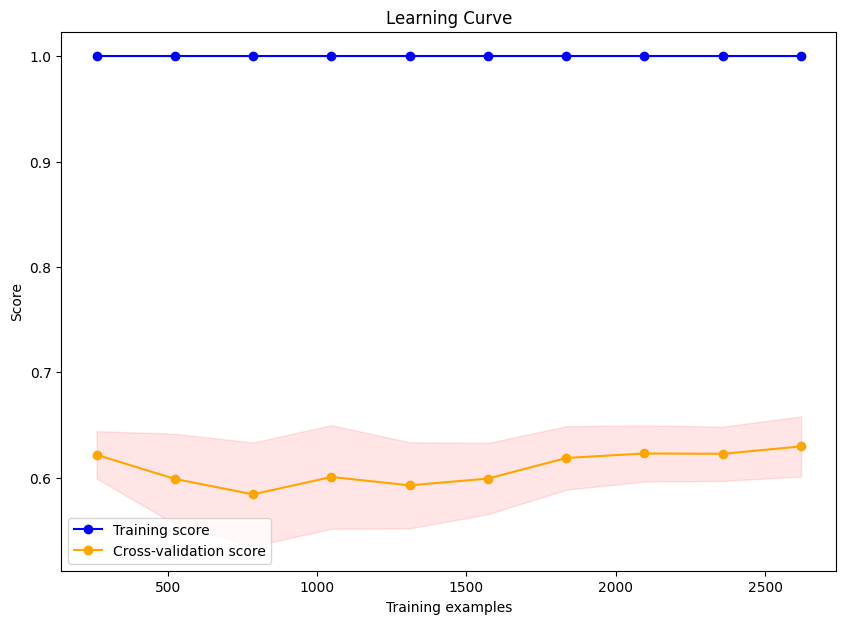

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Rata-rata dan standar deviasi untuk setiap ukuran dataset
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualisasi learning curve
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='red')
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

## lime

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=323e046f2a37b366904e073f0003ca08a11bb5d4b33f29cc9804c2586eb4f47f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
# LIME explainability
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=[0, 1], discretize_continuous=True)

i = 0
exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# LIME explainability
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=[0, 1], discretize_continuous=True)

i = 500
exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## error analysis

In [ ]:
# Mencari data kelas 0 benar prediksi
# Mencari indeks data dengan kelas 0 yang benar diprediksi
correctly_predicted_indices = [i for i, (true_label, predicted_label) in enumerate(zip(y_test, y_pred)) if true_label == 0 and predicted_label == 0]

# Mengambil 50 data pertama dari indeks yang sesuai
indices_to_display = correctly_predicted_indices[:50]

# Membuat DataFrame dari data dengan indeks yang sesuai
df_predicted_correctly = X_test.iloc[indices_to_display]

# Menambahkan kolom target 'Potability' ke DataFrame
df_predicted_correctly['Potability'] = y_test.iloc[indices_to_display]


<ipython-input-140-26e620154da1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted_correctly['Potability'] = y_test.iloc[indices_to_display]


In [ ]:
# Memuat data yang belum dipreprocessing
data_raw = pd.read_csv('Drinking_water.csv')  # Pastikan file ini adalah data sebelum preprocessing

data_raw = data_raw.drop("Unnamed: 0", axis=1)
data_raw = data_raw.drop("Carcinogenics", axis=1)
data_raw = data_raw.drop("medical_waste", axis=1)

data_raw['ph'].fillna(data_raw['ph'].mean(), inplace=True)
data_raw['Sulfate'].fillna(data_raw['Sulfate'].mean(), inplace=True)
data_raw['Trihalomethanes'].fillna(data_raw['Trihalomethanes'].mean(), inplace=True)

# Menyesuaikan indeks data_test dari data preprocessed ke data_raw
data_test_indices = X_test.index[correctly_predicted_indices]

# Mengambil data yang sesuai dari data raw
classified_data_raw = data_raw.iloc[data_test_indices]

# Menyimpan data yang salah klasifikasi ke dalam file CSV
classified_data_raw.to_csv('original_0.csv', index=False)


In [ ]:
# Mencari data kelas 1 benar prediksi
# Mencari indeks data dengan kelas 0 yang benar diprediksi
correctly_predicted_indices = [i for i, (true_label, predicted_label) in enumerate(zip(y_test, y_pred)) if true_label == 1 and predicted_label == 1]

# Mengambil 50 data pertama dari indeks yang sesuai
indices_to_display = correctly_predicted_indices[:50]

# Membuat DataFrame dari data dengan indeks yang sesuai
df_predicted_correctly = X_test.iloc[indices_to_display]

# Menambahkan kolom target 'Potability' ke DataFrame
df_predicted_correctly['Potability'] = y_test.iloc[indices_to_display]


<ipython-input-142-5a60ad0a5ac2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted_correctly['Potability'] = y_test.iloc[indices_to_display]


In [ ]:
# Memuat data yang belum dipreprocessing
data_raw = pd.read_csv('Drinking_water.csv')  # Pastikan file ini adalah data sebelum preprocessing

data_raw = data_raw.drop("Unnamed: 0", axis=1)
data_raw = data_raw.drop("Carcinogenics", axis=1)
data_raw = data_raw.drop("medical_waste", axis=1)

data_raw['ph'].fillna(data_raw['ph'].mean(), inplace=True)
data_raw['Sulfate'].fillna(data_raw['Sulfate'].mean(), inplace=True)
data_raw['Trihalomethanes'].fillna(data_raw['Trihalomethanes'].mean(), inplace=True)

# Menyesuaikan indeks data_test dari data preprocessed ke data_raw
data_test_indices = X_test.index[correctly_predicted_indices]

# Mengambil data yang sesuai dari data raw
classified_data_raw = data_raw.iloc[data_test_indices]

# Menyimpan data yang salah klasifikasi ke dalam file CSV
classified_data_raw.to_csv('original_1.csv', index=False)


In [ ]:
# Combine test set with predictions and actual values for analysis
X_test['Actual'] = y_test
X_test['Predicted'] = y_pred

# Identify misclassified instances
misclassified = X_test[(X_test['Actual'] == 0) & (X_test['Predicted'] == 1)]

print("\nMisclassified Instances:")
print(misclassified)

misclassified.to_csv('misclassified_instances.csv', index=False)


Misclassified Instances:
      Hardness    Solids  Chloramines        ph   Sulfate  Conductivity  \
1042  0.710650  0.305139     0.814272  0.252827  0.637755      0.539643   
2263  0.385962  0.751549     0.744267  1.000000  0.454273      0.504534   
450   0.139426  0.058216     0.904671  0.501089  0.571925      0.735059   
2236  0.934843  0.470221     0.214861  0.391178  0.676480      0.358739   
1426  0.482970  0.368723     0.573054  0.495122  0.623935      0.674831   
864   0.354821  0.342106     0.235532  0.608040  0.474849      0.708683   
3116  0.374143  0.621217     0.559979  0.210518  1.000000      0.535741   
839   0.660066  0.555880     0.681131  0.584425  0.156124      0.675564   
32    0.004182  0.494394     0.630864  1.000000  0.304507      0.476786   
1813  0.410729  0.435681     0.718020  0.604654  0.864973      0.640627   
2168  0.282531  0.585796     0.437287  0.490012  0.500267      0.824877   
239   0.848570  0.505769     0.349217  0.130969  0.836577      0.473142   

In [ ]:
# Identify misclassified instances
misclassified_indices = X_test[(y_test == 0) & (y_pred == 1)].index

print("\nMisclassified Indices:")
print(misclassified_indices)

# Load original (non-preprocessed) dataset
data_original = pd.read_csv('Drinking_water.csv')

data_original = data_original.drop("Unnamed: 0", axis=1)
data_original = data_original.drop("Carcinogenics", axis=1)
data_original = data_original.drop("medical_waste", axis=1)

data_original['ph'].fillna(data_original['ph'].mean(), inplace=True)
data_original['Sulfate'].fillna(data_original['Sulfate'].mean(), inplace=True)
data_original['Trihalomethanes'].fillna(data_original['Trihalomethanes'].mean(), inplace=True)

# Retrieve misclassified instances from original dataset
misclassified_original_data = data_original.loc[misclassified_indices]

print("\nMisclassified Instances from Original Dataset:")
print(misclassified_original_data)

# Optionally, save the misclassified instances to a CSV file for further analysis
misclassified_original_data.to_csv('misclassified_original_data.csv', index=False)


Misclassified Indices:
Index([1042, 2263,  450, 2236, 1426,  864, 3116,  839,   32, 1813, 2168,  239,
       1798, 3033, 3083,   44, 1714,  194, 1840,  596,  463,  218, 1745,  479,
       2626, 2131, 2087,   33, 1741, 1850, 1783, 1650, 1835, 2877, 3115, 1041,
       2077,  410, 2178,   67, 2682, 2668, 3032,  605,  166, 1883, 2614, 2608,
        572, 2164, 2593, 2184, 3001, 1451,  565,  601],
      dtype='int64')

Misclassified Instances from Original Dataset:
             ph    Hardness        Solids  Chloramines     Sulfate  \
1042   5.499489  230.308775  13902.968646     9.619575  352.084333   
2263  11.235426  178.596496  33773.107061     9.063042  327.650960   
450    7.080795  139.331152   2912.211247    10.338234  343.318021   
2236   6.380717  266.015410  21250.935634     4.854335  357.241027   
1426   7.042794  194.046719  16733.124103     7.701926  350.243966   
864    7.762021  173.636742  15548.416674     5.018671  330.390976   
3116   5.230003  176.714023  27971.891806    


# skenario

In [ ]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
list1 = data.iloc[2:3, 0:9].values.flatten().tolist()
list1

[0.6609642246905196,
 0.6725225324732617,
 0.4400851729232835,
 0.7710397824410945,
 0.5002671853491067,
 0.488891004691268,
 0.6423083123408289,
 0.497039805358844,
 0.2845384939834728]

In [ ]:
ph = 8.3
Hardness= 214
Solids=  22018.5
Chloramines = 8.1
Sulfate = 360
Conductivity = 18


In [ ]:
input_data =[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity]

In [ ]:
scaler = MinMaxScaler()
water_data = scaler.fit_transform([[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity]])
water_data

array([[0., 0., 0., 0., 0., 0.]])

In [ ]:
model_pred = model.predict(water_data)
model_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
if model_pred[0] == 0:
  print("Air Tidak bisa diminum")
else:
  print("Air Bisa diminum")

Air Bisa diminum


In [ ]:
def water_quality_prediction(input_data):
  scaled_data = scaler.transform([input_data])
  model_pred=model.predict(scaled_data)
  if model_pred[0] == 0:
   print("Air Tidak bisa diminum")
  else:
   print("Air Bisa diminum")

In [ ]:
ph = float(input('Masukkan nilai PH (0-14)= '))
Hardness= float(input('Masukkan nilai Hardness (Mg/L) = '))
Solids=  float(input('Masukkan nilai Solids (Mg/L) = '))
Chloramines = float(input('Masukkan nilai Chloramines (Mg/L) = '))
Sulfate = float(input('Masukkan nilai Sulfate (Mg/L) = '))
Conductivity = float(input('Masukkan nilai Conductivity (Mg/L)= '))

input_data =[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity]
water_quality_prediction(input_data)

Masukkan nilai PH (0-14)= 8
Masukkan nilai Hardness (Mg/L) = 1000
Masukkan nilai Solids (Mg/L) = 2000
Masukkan nilai Chloramines (Mg/L) = 5
Masukkan nilai Sulfate (Mg/L) = 30
Masukkan nilai Conductivity (Mg/L)= 8
Air Bisa diminum


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
